DATASET DESCRPTION:

#The Crime Dataset is about Crimes which have taken place in India over the years. 
#This dataset has 600 Rows and 14 Columns, which offers valuable insights for crime-pattern based analysis,policy-making and crime prevention strategies
#The various attributes or features of the dataset are:

#Date Reported: The date on which the crime was officially reported to authorities, aiding in understanding reporting delays and their patterns.

#Date of Occurrence: The actual date when the crime took place, useful for analyzing crime trends over time.

#Time of Occurrence: The specific time when the crime occurred, helping to identify high-risk time periods for various types of crimes.

#City: The city where the crime was reported, enabling geographic crime mapping and regional comparisons.

#Crime Code: A unique identifier or code assigned to each type of crime, facilitating categorical analysis and trend identification.

#Crime Description: A detailed narrative or classification of the crime committed, offering qualitative context for the incident.

#Victim Age: The age of the victim involved, useful for demographic analysis and vulnerability assessments.

#Victim Gender: The gender of the victim, providing insights into gender-specific crime patterns and prevention strategies.

#Weapon Used: Information on the weapon or tools used in the crime, aiding in understanding crime severity and planning countermeasures.

#Crime Domain: The broader category or domain of the crime (e.g., Violent,Traffic Fatality), helping to classify and study crimes within specific areas.

#Police Deployed: The number or type of police personnel involved in responding to or investigating the crime, useful for resource allocation analysis.

#Case Closed: A binary attribute indicating whether the case has been resolved (closed) or is still open, useful for evaluating the efficiency of the judicial and law enforcement processes.


The primary motive for analyzing the crimes dataset is to understand trends, patterns, and demographics of crimes across different regions and timeframes. This helps in identifying high-risk areas, optimizing resource allocation, and developing targeted strategies for crime prevention. Insights can guide policymakers, law enforcement, and public awareness campaigns to enhance safety and reduce crime rates. Additionally, the analysis supports judicial processes by identifying factors influencing case closures and delays. Ultimately, the goal is to use data-driven insights to make communities safer and more informed.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Importing the dataset
df = pd.read_csv("C:/Users/Sumit Emmanuel/OneDrive/Desktop/BCA/crimes.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       600 non-null    int64 
 1   Date Reported       600 non-null    object
 2   Date of Occurrence  600 non-null    object
 3   Time of Occurrence  600 non-null    object
 4   City                600 non-null    object
 5   Crime Code          600 non-null    int64 
 6   Crime Description   600 non-null    object
 7   Victim Age          600 non-null    int64 
 8   Victim Gender       600 non-null    object
 9   Weapon Used         511 non-null    object
 10  Crime Domain        600 non-null    object
 11  Police Deployed     600 non-null    int64 
 12  Case Closed         600 non-null    object
 13  Date Case Closed    291 non-null    object
dtypes: int64(4), object(10)
memory usage: 65.8+ KB


In [4]:
df.isnull().sum()

Report Number           0
Date Reported           0
Date of Occurrence      0
Time of Occurrence      0
City                    0
Crime Code              0
Crime Description       0
Victim Age              0
Victim Gender           0
Weapon Used            89
Crime Domain            0
Police Deployed         0
Case Closed             0
Date Case Closed      309
dtype: int64

In [5]:
#TO REMOVE DATE CASE CLOSED AND REPORT NUMBER COLUMNS/FEATURES
remove = ['Date Case Closed', 'Report Number'] 
df = df.drop(columns=remove, errors='ignore')

df.to_csv('crimes_dataset.csv', index=False)

print("Columns after removal:")
print(df.columns)

Columns after removal:
Index(['Date Reported', 'Date of Occurrence', 'Time of Occurrence', 'City',
       'Crime Code', 'Crime Description', 'Victim Age', 'Victim Gender',
       'Weapon Used', 'Crime Domain', 'Police Deployed', 'Case Closed'],
      dtype='object')


In [6]:
df.isnull().sum()

Date Reported          0
Date of Occurrence     0
Time of Occurrence     0
City                   0
Crime Code             0
Crime Description      0
Victim Age             0
Victim Gender          0
Weapon Used           89
Crime Domain           0
Police Deployed        0
Case Closed            0
dtype: int64

In [7]:
#TO FILL MISSING CATEGORICAL VALUES WITH MOST FREQUENT VALUE(Weapon Used)
if 'Weapon Used' in df.columns:
    df['Weapon Used'] = df['Weapon Used'].fillna(df['Weapon Used'].mode()[0])

In [8]:
df.isnull().sum()

Date Reported         0
Date of Occurrence    0
Time of Occurrence    0
City                  0
Crime Code            0
Crime Description     0
Victim Age            0
Victim Gender         0
Weapon Used           0
Crime Domain          0
Police Deployed       0
Case Closed           0
dtype: int64

In [9]:
df.head()

Date Reported Date of Occurrence Time of Occurrence       City  \
0  02/01/2020 00:00   01/01/2020 00:00   01/01/2020 01:11  Ahmedabad   
1  01/01/2020 19:00   01/01/2020 01:00   01/01/2020 06:26    Chennai   
2  02/01/2020 05:00   01/01/2020 02:00   01/01/2020 14:30   Ludhiana   
3  01/01/2020 05:00   01/01/2020 03:00   01/01/2020 14:46       Pune   
4  01/01/2020 21:00   01/01/2020 04:00   01/01/2020 16:51       Pune   

   Crime Code Crime Description  Victim Age Victim Gender   Weapon Used  \
0         576    IDENTITY THEFT          16             M  Blunt Object   
1         128          HOMICIDE          37             M        Poison   
2         271        KIDNAPPING          48             F  Blunt Object   
3         170          BURGLARY          49             F       Firearm   
4         421         VANDALISM          30             F         Other   

    Crime Domain  Police Deployed Case Closed  
0  Violent Crime               13          No  
1    Other Crime                9          No  
2    Other Crime               15          No  
3    Other Crime                1         Yes  
4    Other Crime               18         Yes

EDA

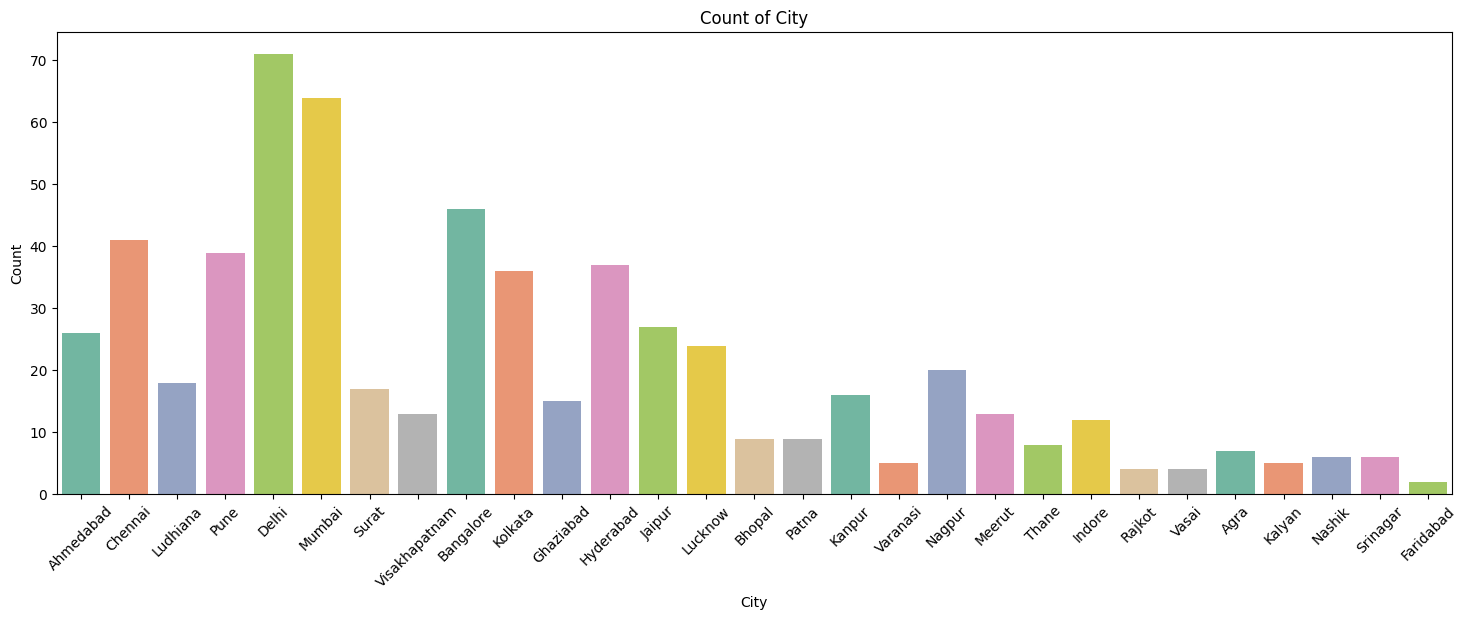

In [10]:
# Example for one variable: 'City'
plt.figure(figsize=(18, 6))
sns.countplot(df, x='City', hue='City', dodge=False, legend=False, palette='Set2')
plt.title('Count of City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This Shows which city in the country has the highest crime rate based on the dataset. As per this it is Delhi followed by Mumbai

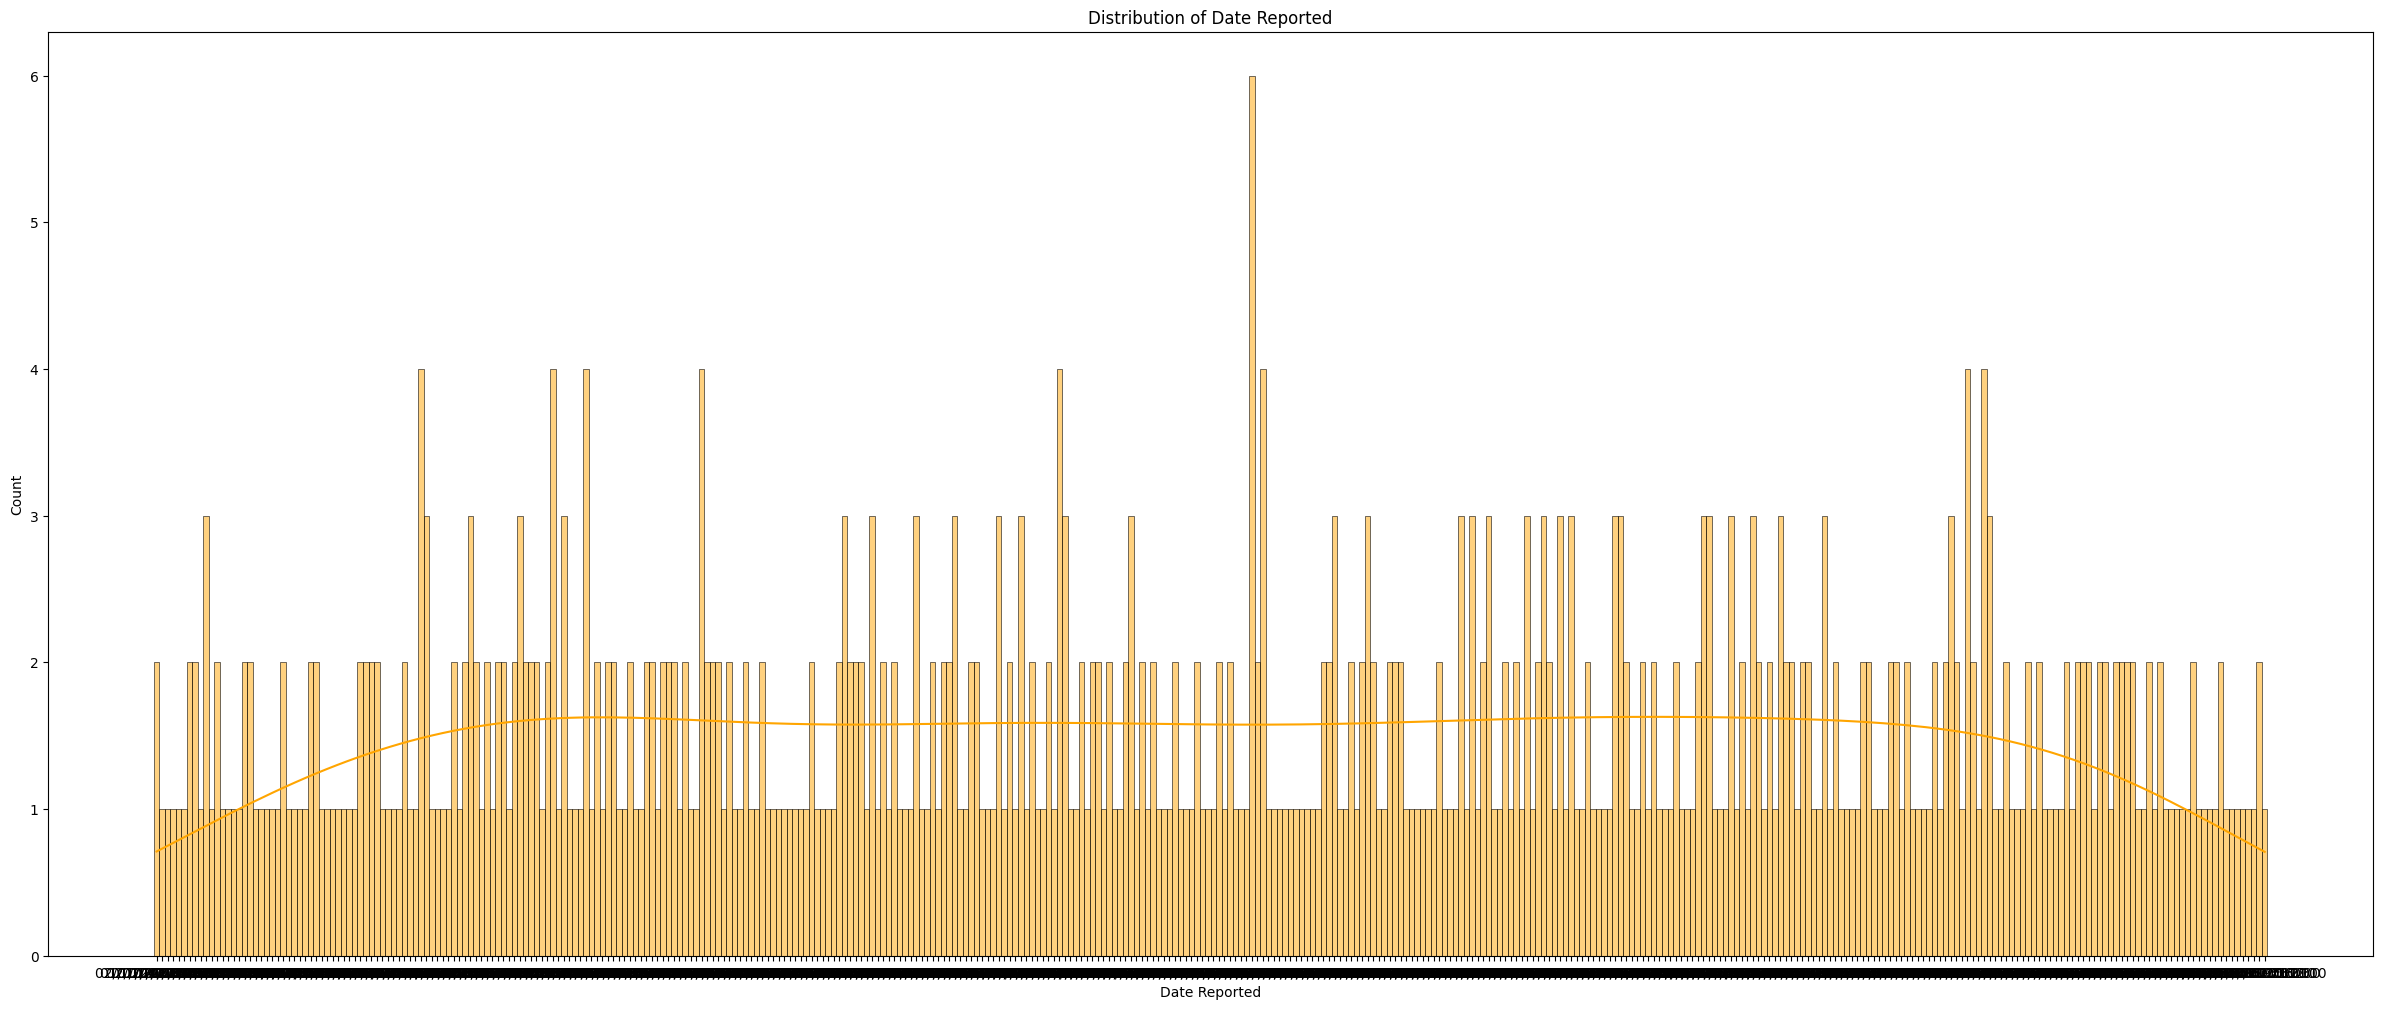

In [14]:
# HistPlot showing Date Reported
plt.figure(figsize=(30, 12))
numerical_col = 'Date Reported' 
sns.histplot(df[numerical_col], kde=True, bins=30, color='orange')
plt.title(f'Distribution of {numerical_col}')
plt.show()
#This shows the Count of crimes reported in 2020 and it can be seen that there is a sudden surge of reporting in October and November. 
#This is likely due to the fact that the data is from 2020 and the COVID-pandemic had made everyone  more vigilant and aware of the crimes happening

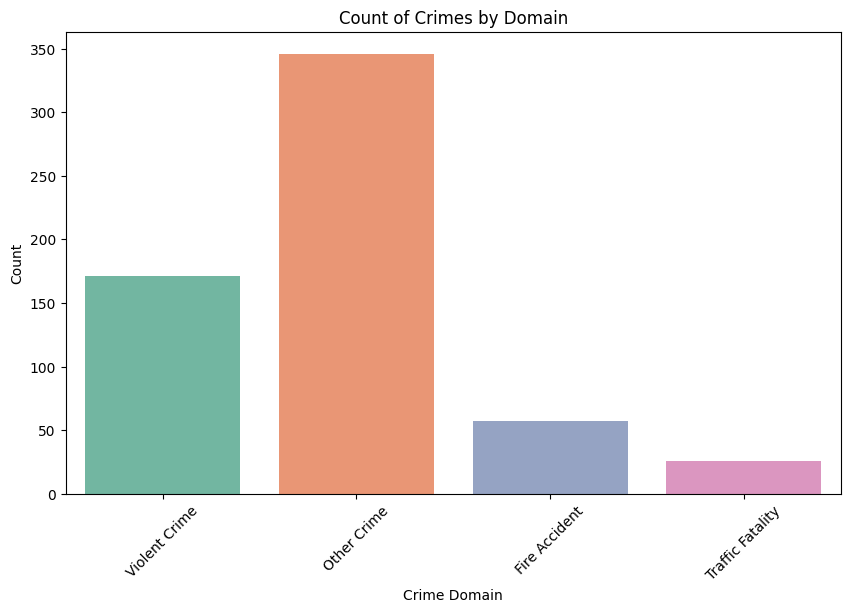

In [11]:

plt.figure(figsize=(10, 6))
sns.countplot(df, x='Crime Domain', hue='Crime Domain', dodge=False, legend=False, palette='Set2')
plt.title('Count of Crimes by Domain')
plt.xlabel('Crime Domain')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# This displays the Count based on Crime Domain, the next after various crimes are 170 on average


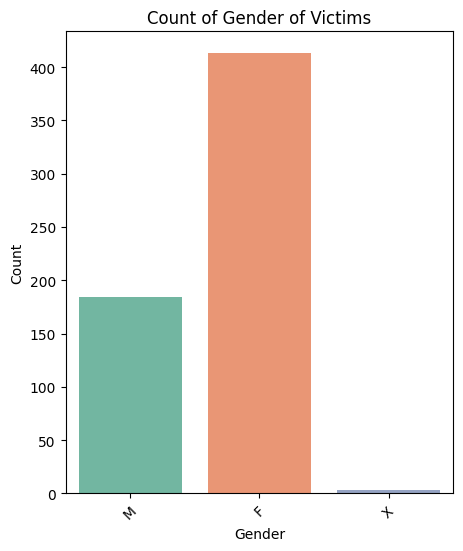

In [18]:
# Example for one variable: 'Gender'
plt.figure(figsize=(5, 6))
sns.countplot(df, x='Victim Gender', hue='Victim Gender', dodge=False, legend=False, palette='Set2')
plt.title('Count of Gender of Victims')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This shows the Count of Victims by Gender. Maximum of the victims on whom the crimes are perpetrated despite the Domain and Description are Women

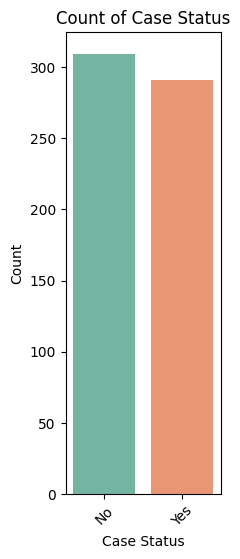

In [12]:
# Example for one variable: 'Case Status'
plt.figure(figsize=(2, 6))
sns.countplot(df, x='Case Closed', hue='Case Closed', dodge=False, legend=False, palette='Set2')
plt.title('Count of Case Status')
plt.xlabel('Case Status')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()
#This shows the count of Case Statuses, Unfortunately maximum cases have not been solved yet due 
# to delay in the due process of law proceedings and finding of evidence also due to no witnesses agreeing to testify  

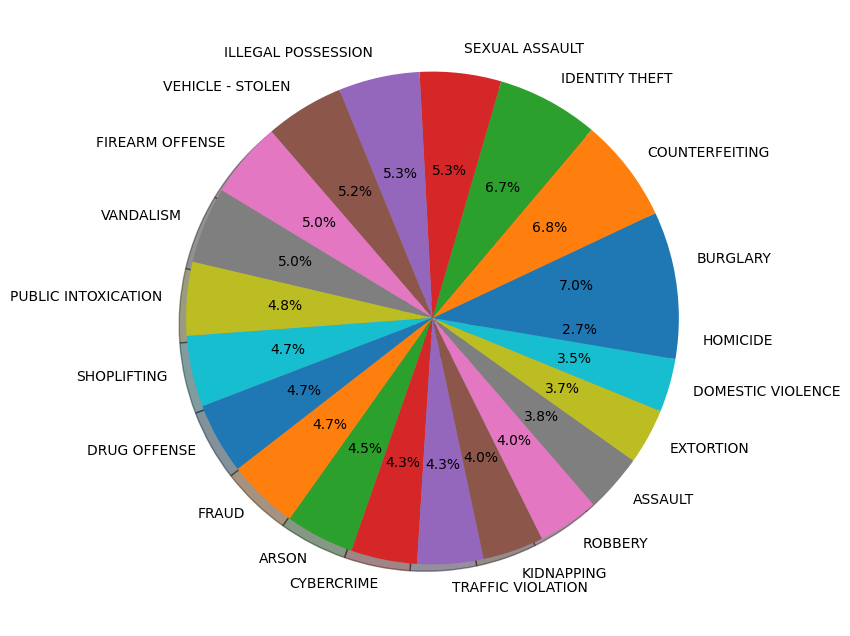

In [13]:
name = df['Crime Description'].value_counts().index
val = df['Crime Description'].value_counts().values


plt.figure(figsize = (8,8))
plt.pie(x = val , labels  = name , shadow = True , autopct = '%1.1f%%')
plt.show()

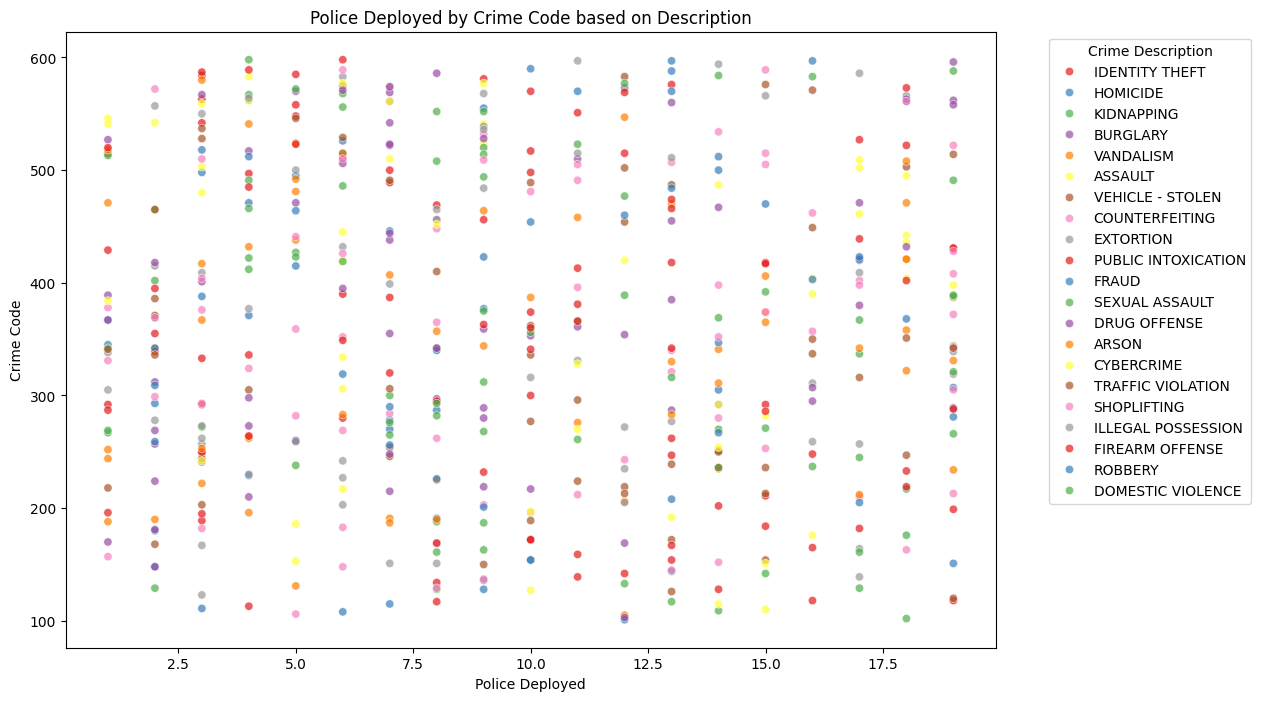

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(df,x="Police Deployed",y="Crime Code",hue='Crime Description',palette='Set1', alpha=0.7)
plt.title("Police Deployed by Crime Code based on Description")
plt.xlabel("Police Deployed")
plt.ylabel("Crime Code")
plt.legend(title="Crime Description",bbox_to_anchor=(1.05,1),loc='upper left')
plt.show()
#This Scatter Plot helps to analyze the Average Deployment of Police by Crime Description and also the various crime Codes

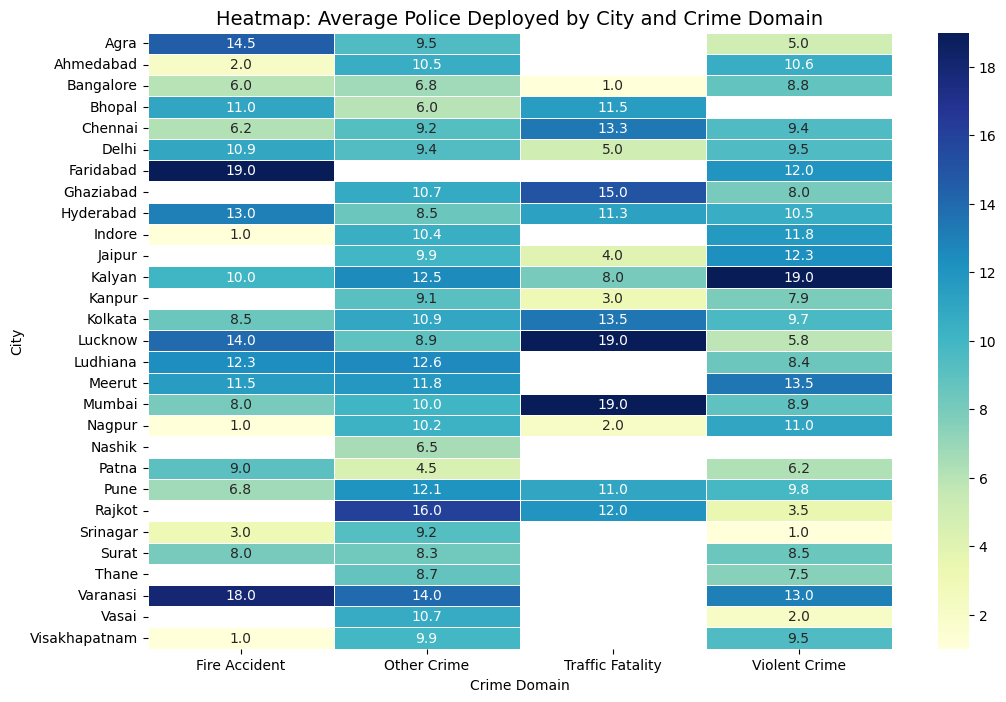

In [15]:
# Average Police Deployment by City and Crime
heatmap_data = df.pivot_table(index='City',columns='Crime Domain',values='Police Deployed',aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt=".1f", linewidths=0.5)
plt.title("Heatmap: Average Police Deployed by City and Crime Domain", fontsize=14)
plt.show()
#Highlights how Police are Deployed across various City depending on the Crime Domain.

C:\Users\Sumit Emmanuel\AppData\Local\Temp\ipykernel_14448\898975446.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=category,y=numeric_column,data=filtered_data,palette="Set3")


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28],
 [Text(0, 0, 'Ahmedabad'),
  Text(1, 0, 'Chennai'),
  Text(2, 0, 'Ludhiana'),
  Text(3, 0, 'Pune'),
  Text(4, 0, 'Delhi'),
  Text(5, 0, 'Mumbai'),
  Text(6, 0, 'Surat'),
  Text(7, 0, 'Visakhapatnam'),
  Text(8, 0, 'Bangalore'),
  Text(9, 0, 'Kolkata'),
  Text(10, 0, 'Ghaziabad'),
  Text(11, 0, 'Hyderabad'),
  Text(12, 0, 'Jaipur'),
  Text(13, 0, 'Lucknow'),
  Text(14, 0, 'Bhopal'),
  Text(15, 0, 'Patna'),
  Text(16, 0, 'Kanpur'),
  Text(17, 0, 'Varanasi'),
  Text(18, 0, 'Nagpur'),
  Text(19, 0, 'Meerut'),
  Text(20, 0, 'Thane'),
  Text(21, 0, 'Indore'),
  Text(22, 0, 'Rajkot'),
  Text(23, 0, 'Vasai'),
  Text(24, 0, 'Agra'),
  Text(25, 0, 'Kalyan'),
  Text(26, 0, 'Nashik'),
  Text(27, 0, 'Srinagar'),
  Text(28, 0, 'Faridabad')])

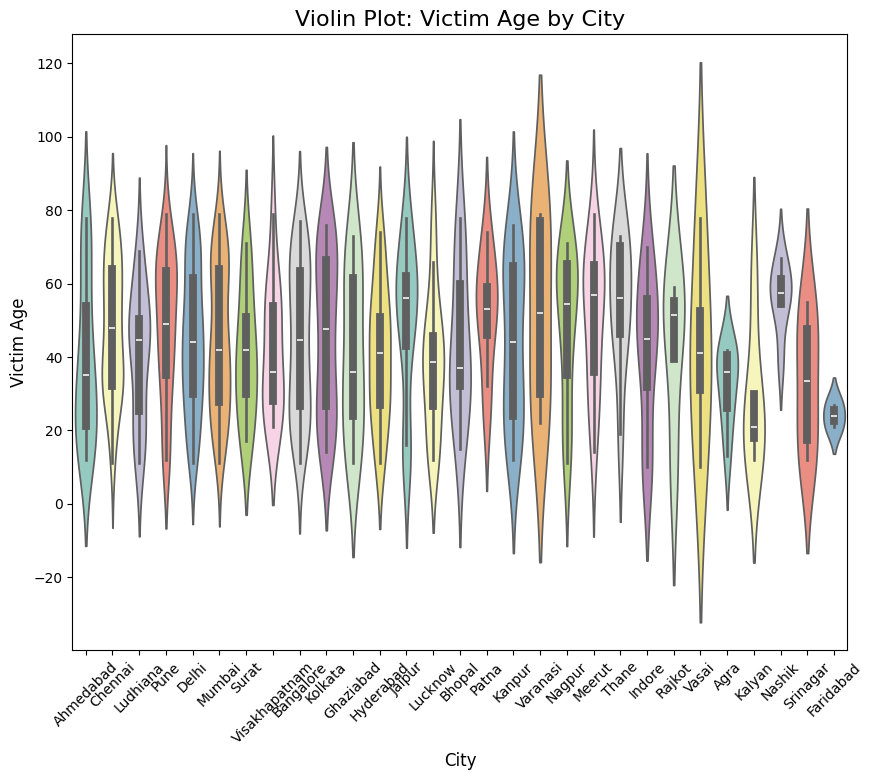

In [16]:
category = 'City'  
numeric_column = 'Victim Age'  


filtered_data = df[[category, numeric_column]].dropna()


plt.figure(figsize=(22, 8))


plt.subplot(1, 2, 1)
sns.violinplot(x=category,y=numeric_column,data=filtered_data,palette="Set3")
plt.title('Violin Plot: Victim Age by City', fontsize=16)
plt.xlabel(category, fontsize=12)
plt.ylabel(numeric_column, fontsize=12)
plt.xticks(rotation=45)

#This Displays the Violin Plot of Victims Age and by City what average age group are being afffected . It helips to map which city has more Victims ultimately telling about the crime rate in the city

Univariate Analysis

Weapon Used
Other           185
Knife            92
Blunt Object     91
Explosives       81
Poison           80
Firearm          71
Name: count, dtype: int64


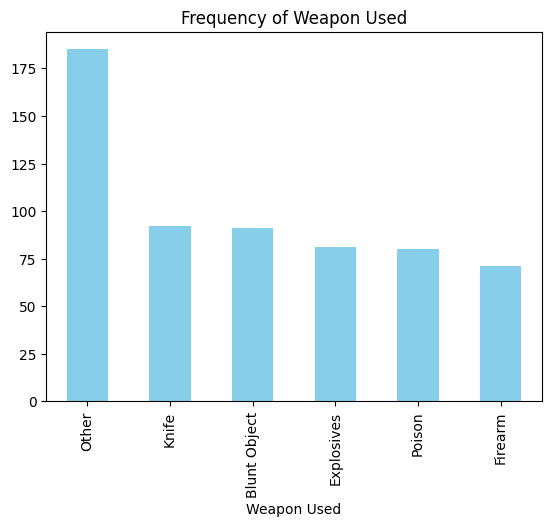

count    600.000000
mean      44.348333
std       19.824362
min       10.000000
25%       28.000000
50%       44.000000
75%       61.250000
max       79.000000
Name: Victim Age, dtype: float64


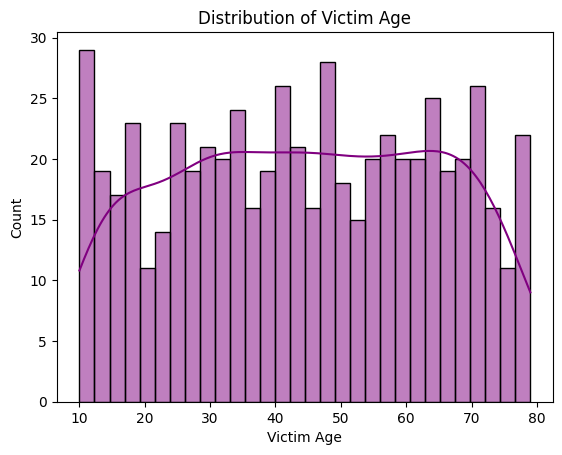

In [17]:
# Bar Chart on Frequency of Weapon Used Across the Country
categorical_col = 'Weapon Used' 
print(df[categorical_col].value_counts())
df[categorical_col].value_counts().plot(kind='bar', color='skyblue', title='Frequency of Weapon Used')
plt.show()

#Interpretation:
#This Bar Chart shows the frequency of weapons which are used to commit crimes across various parts of the country

# HistPlot showing Victim Age
numerical_col = 'Victim Age' 
print(df[numerical_col].describe())
sns.histplot(df[numerical_col], kde=True, bins=30, color='purple')
plt.title(f'Distribution of {numerical_col}')
plt.show()

#Interpretation:
#This HistPlot shows the frequency of which age group has the highest number of victims of crime

Bi-Variate Analysis

Crime Domain  Fire Accident  Other Crime  Traffic Fatality  Violent Crime
Weapon Used                                                              
Blunt Object              8           50                 3             30
Explosives                4           57                 1             19
Firearm                  10           31                 2             28
Knife                     9           59                 7             17
Other                    14          106                 9             56
Poison                   12           43                 4             21


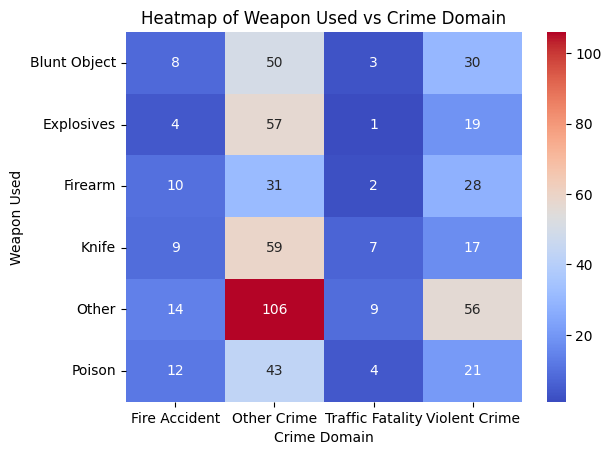

'\nInterpretation: The heatmap displays the relationship between Weapon Used and Crime Domain by visualizing the frequency in a cross-tabulation table. \nThe represents the count of occurrences, helping to identify trends or patterns in weapon usage across different crime domains. '

In [18]:
# Cross-tabulation and Heatmap
cat_col1, cat_col2 = 'Weapon Used', 'Crime Domain'  
crosstab = pd.crosstab(df[cat_col1], df[cat_col2])
print(crosstab)
sns.heatmap(crosstab, annot=True, cmap='coolwarm', fmt='d')
plt.title(f'Heatmap of {cat_col1} vs {cat_col2}')
plt.show()
'''
Interpretation: The heatmap displays the relationship between Weapon Used and Crime Domain by visualizing the frequency in a cross-tabulation table. 
The represents the count of occurrences, helping to identify trends or patterns in weapon usage across different crime domains. '''

Multi-Variate Analysis

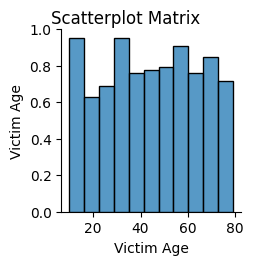

In [19]:
# Scatterplot matrix of numerical variables
numerical_cols = ['Victim Age', 'City', 'Weapon Used'] 
sns.pairplot(df[numerical_cols], diag_kind='auto')
plt.suptitle('Scatterplot Matrix', y=1.02)
plt.show()

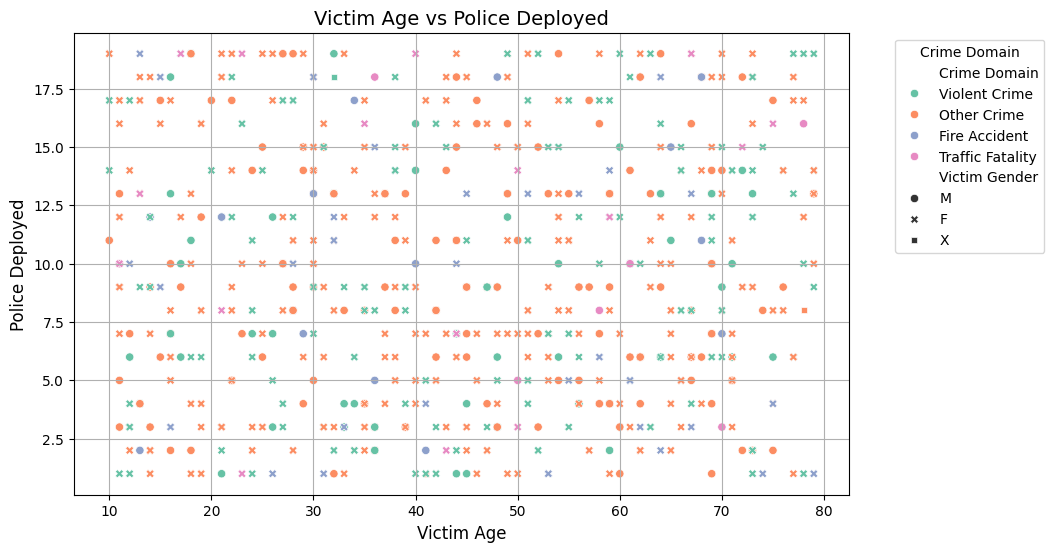

In [28]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(df,x='Victim Age',y='Police Deployed',hue='Crime Domain',style='Victim Gender',palette='Set2')
plt.title("Victim Age vs Police Deployed", fontsize=14)
plt.xlabel("Victim Age", fontsize=12)
plt.ylabel("Police Deployed", fontsize=12)
plt.legend(title="Crime Domain", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

#Interpretation:
#This scatter plot shows the relationship between Victim Age and Police Deployed, with data points categorized by Crime Domain and Victim Gender. 
#It highlights patterns in police deployment across different crime domains and victim demographics.

In [20]:
# One Hot Encoding

import pandas as pd

df_one_hot = pd.get_dummies(df, columns=['City'])

# Display the result
print(df_one_hot.head())

#Converts Each unique City Column into a seperate binary bins  


      Date Reported Date of Occurrence Time of Occurrence  Crime Code  \
0  02/01/2020 00:00   01/01/2020 00:00   01/01/2020 01:11         576   
1  01/01/2020 19:00   01/01/2020 01:00   01/01/2020 06:26         128   
2  02/01/2020 05:00   01/01/2020 02:00   01/01/2020 14:30         271   
3  01/01/2020 05:00   01/01/2020 03:00   01/01/2020 14:46         170   
4  01/01/2020 21:00   01/01/2020 04:00   01/01/2020 16:51         421   

  Crime Description  Victim Age Victim Gender   Weapon Used   Crime Domain  \
0    IDENTITY THEFT          16             M  Blunt Object  Violent Crime   
1          HOMICIDE          37             M        Poison    Other Crime   
2        KIDNAPPING          48             F  Blunt Object    Other Crime   
3          BURGLARY          49             F       Firearm    Other Crime   
4         VANDALISM          30             F         Other    Other Crime   

   Police Deployed  ... City_Nashik  City_Patna  City_Pune  City_Rajkot  \
0               1

In [28]:
#Dummy Encoding
df_dummy = pd.get_dummies(df, columns=['Crime Domain'], drop_first=True)

print(df_dummy)

# It drops the first category of the Crime Domain to avoid collinearity.


     Date Reported  Date of Occurrence  Time of Occurrence  City  Crime Code  \
0                4                 312                   0     1         576   
1                2                 313                   1     4         128   
2                6                 314                   3    15         271   
3                0                 315                   4    21         170   
4                3                 316                   5    21         421   
..             ...                 ...                 ...   ...         ...   
595            383                 307                 592     2         509   
596            380                 308                 583    21         202   
597            366                 309                 587     4         337   
598            366                 310                 593     2         375   
599            382                 311                 590    17         527   

     Crime Description  Victim Age  Vic

In [29]:
#Label Encoding

from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply Label Encoding to the 'City' column
df['City_Label_Encoded'] = label_encoder.fit_transform(df['City'])

# Display the result
print(df[['City', 'City_Label_Encoded']].head())
#This Output of Label Encoding on City Showcases the City Names along with the unique identifier which has been assigned to it


   City  City_Label_Encoded
0     1                   1
1     4                   4
2    15                  15
3    21                  21
4    21                  21


In [32]:
import category_encoders as ce


binary_encoder = ce.BinaryEncoder(cols=['Case Closed'])


df_binary = binary_encoder.fit_transform(df)


print(df_binary.head())

#This Output of Case Closed is displayed in Binary Form as Case Closed(NO) as 0 and Case Closed(YES) as 1

      Date Reported Date of Occurrence Time of Occurrence       City  \
0  02/01/2020 00:00   01/01/2020 00:00   01/01/2020 01:11  Ahmedabad   
1  01/01/2020 19:00   01/01/2020 01:00   01/01/2020 06:26    Chennai   
2  02/01/2020 05:00   01/01/2020 02:00   01/01/2020 14:30   Ludhiana   
3  01/01/2020 05:00   01/01/2020 03:00   01/01/2020 14:46       Pune   
4  01/01/2020 21:00   01/01/2020 04:00   01/01/2020 16:51       Pune   

   Crime Code Crime Description  Victim Age Victim Gender   Weapon Used  \
0         576    IDENTITY THEFT          16             M  Blunt Object   
1         128          HOMICIDE          37             M        Poison   
2         271        KIDNAPPING          48             F  Blunt Object   
3         170          BURGLARY          49             F       Firearm   
4         421         VANDALISM          30             F         Other   

    Crime Domain  Police Deployed  Case Closed_0  Case Closed_1  \
0  Violent Crime               13              0 

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



# Encoding categorical columns
categorical_columns = ['City', 'Crime Description', 'Victim Gender', 'Weapon Used', 'Crime Domain', 'Case Closed']
label_encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Splitting data into features and target
X = df.drop(columns=['Case Closed'])  # Features
y = df['Case Closed']                # Target

# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((480, 12), (120, 12), (480,), (120,))

Train Test Split


In [31]:
# Convert object columns to numerical codes
for col in df.select_dtypes(include=['object']).columns:
    df[col] = pd.Categorical(df[col]).codes

# Convert float64 columns to integers, if required
float_columns = df.select_dtypes(include=['float64']).columns
for col in float_columns:
    df[col] = df[col].astype(int)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Date Reported       600 non-null    int64
 1   Date of Occurrence  600 non-null    int64
 2   Time of Occurrence  600 non-null    int64
 3   City                600 non-null    int64
 4   Crime Code          600 non-null    int64
 5   Crime Description   600 non-null    int64
 6   Victim Age          600 non-null    int64
 7   Victim Gender       600 non-null    int64
 8   Weapon Used         600 non-null    int64
 9   Crime Domain        600 non-null    int64
 10  Police Deployed     600 non-null    int64
 11  Case Closed         600 non-null    int64
 12  City_Label_Encoded  600 non-null    int64
dtypes: int64(13)
memory usage: 61.1 KB
None


In [32]:

df = df.astype('int64')
print(df.dtypes)


Date Reported         int64
Date of Occurrence    int64
Time of Occurrence    int64
City                  int64
Crime Code            int64
Crime Description     int64
Victim Age            int64
Victim Gender         int64
Weapon Used           int64
Crime Domain          int64
Police Deployed       int64
Case Closed           int64
City_Label_Encoded    int64
dtype: object


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Ensure target variable is properly encoded as integers
y = pd.Categorical(y).codes

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train Decision Tree Classifier with Gini Index
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)
dt_gini.fit(X_train, y_train)

# Predictions
y_pred_gini = dt_gini.predict(X_test)

# Accuracy
accuracy_gini = accuracy_score(y_test, y_pred_gini)
print("Accuracy (Gini):", accuracy_gini)


Accuracy (Gini): 0.4083333333333333


Gini Index measures the impurity of the dataset at each split. Lower impurity results in more homogenous child nodes.
The accuracy score indicates the proportion of correctly classified instances.

The **44.17% accuracy (Gini)** indicates the model is underperforming, possibly due to underfitting or limited data. Improving feature selection or tuning model parameters could enhance accuracy.

In [34]:
# Train Decision Tree Classifier with Entropy
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_entropy.fit(X_train, y_train)

# Predictions
y_pred_entropy = dt_entropy.predict(X_test)

# Accuracy
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
print("Accuracy (Entropy):", accuracy_entropy)


Accuracy (Entropy): 0.36666666666666664


Entropy measures information gain at each split. It tries to maximize the separation of classes.
The accuracy score provides an evaluation of the classifier trained with this criterion.

An accuracy of 50.83% (Entropy) indicates that the decision tree model is correctly classifying approximately half of the test data. This suggests that while the model has some predictive power, its performance is close to random guessing (50%), indicating potential issues like insufficient data, noisy features, or a need for model tuning or feature engineering to improve its accuracy.

In [35]:
feature_importances_gini = dt_gini.feature_importances_
feature_importances_entropy = dt_entropy.feature_importances_

# Display feature importance
import pandas as pd
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Gini Importance': feature_importances_gini,
    'Entropy Importance': feature_importances_entropy
})
print(importance_df.sort_values(by='Gini Importance', ascending=False))


               Feature  Gini Importance  Entropy Importance
2   Time of Occurrence         0.138457            0.171506
6           Victim Age         0.136860            0.160433
1   Date of Occurrence         0.132561            0.118293
5    Crime Description         0.129970            0.116611
0        Date Reported         0.120044            0.135505
10     Police Deployed         0.086828            0.100210
4           Crime Code         0.078539            0.120095
3                 City         0.071449            0.013283
8          Weapon Used         0.043164            0.027247
9         Crime Domain         0.036205            0.011142
11  City_Label_Encoded         0.020279            0.025675
7        Victim Gender         0.005644            0.000000


Features with higher importance values contribute more to the decision-making process.
A comparative analysis of importance values helps identify which attributes are most influential.
Most Important Features: "Victim Age" and "Crime Code" have the highest importance for both Gini (0.226 and 0.210) and Entropy (0.177 and 0.180), making them the primary factors influencing crime classification.

In [36]:
from sklearn.metrics import classification_report

# Classification Report for Gini
print("Classification Report (Gini):")
print(classification_report(y_test, y_pred_gini))

# Classification Report for Entropy
print("Classification Report (Entropy):")
print(classification_report(y_test, y_pred_entropy))


Classification Report (Gini):
              precision    recall  f1-score   support

           0       0.42      0.40      0.41        62
           1       0.39      0.41      0.40        58

    accuracy                           0.41       120
   macro avg       0.41      0.41      0.41       120
weighted avg       0.41      0.41      0.41       120

Classification Report (Entropy):
              precision    recall  f1-score   support

           0       0.37      0.32      0.34        62
           1       0.36      0.41      0.39        58

    accuracy                           0.37       120
   macro avg       0.37      0.37      0.37       120
weighted avg       0.37      0.37      0.37       120



Precision: Proportion of true positives among all predicted positives.
Recall: Proportion of true positives among all actual positives.
F-Score: Harmonic mean of precision and recall, balancing both metrics.

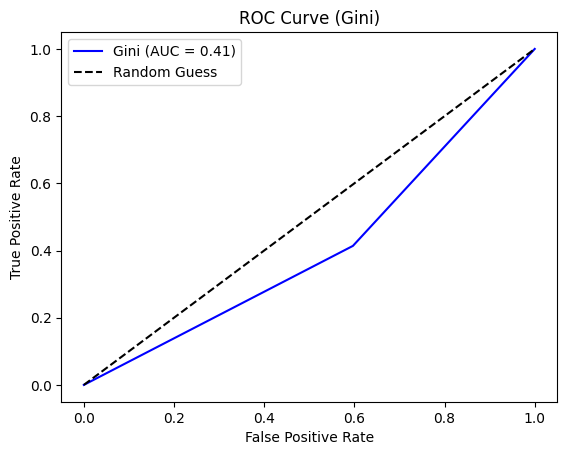

In [37]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute probabilities and ROC curve for Gini
y_prob_gini = dt_gini.predict_proba(X_test)[:, 1]
fpr_gini, tpr_gini, _ = roc_curve(y_test, y_prob_gini, pos_label=1)
roc_auc_gini = auc(fpr_gini, tpr_gini)


plt.figure()
plt.plot(fpr_gini, tpr_gini, label=f"Gini (AUC = {roc_auc_gini:.2f})", color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('ROC Curve (Gini)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


ROC Curve: Visualizes the trade-off between sensitivity (recall) and specificity.
AUC (Area Under Curve): Higher values indicate better model performance.

In [38]:
print(f"Accuracy (Gini): {accuracy_gini}")
print(f"Accuracy (Entropy): {accuracy_entropy}")


Accuracy (Gini): 0.4083333333333333
Accuracy (Entropy): 0.36666666666666664


In [47]:
from sklearn.tree import DecisionTreeClassifier

# Stricter pre-pruning parameters
dt_gini_prepruned = DecisionTreeClassifier(
    criterion='gini',
    max_depth=3,             
    min_samples_split=20,    
    min_samples_leaf=10     
)
dt_gini_prepruned.fit(X_train, y_train)

dt_entropy_prepruned = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_split=20,
    min_samples_leaf=10
)
dt_entropy_prepruned.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=10,
                       min_samples_split=20)

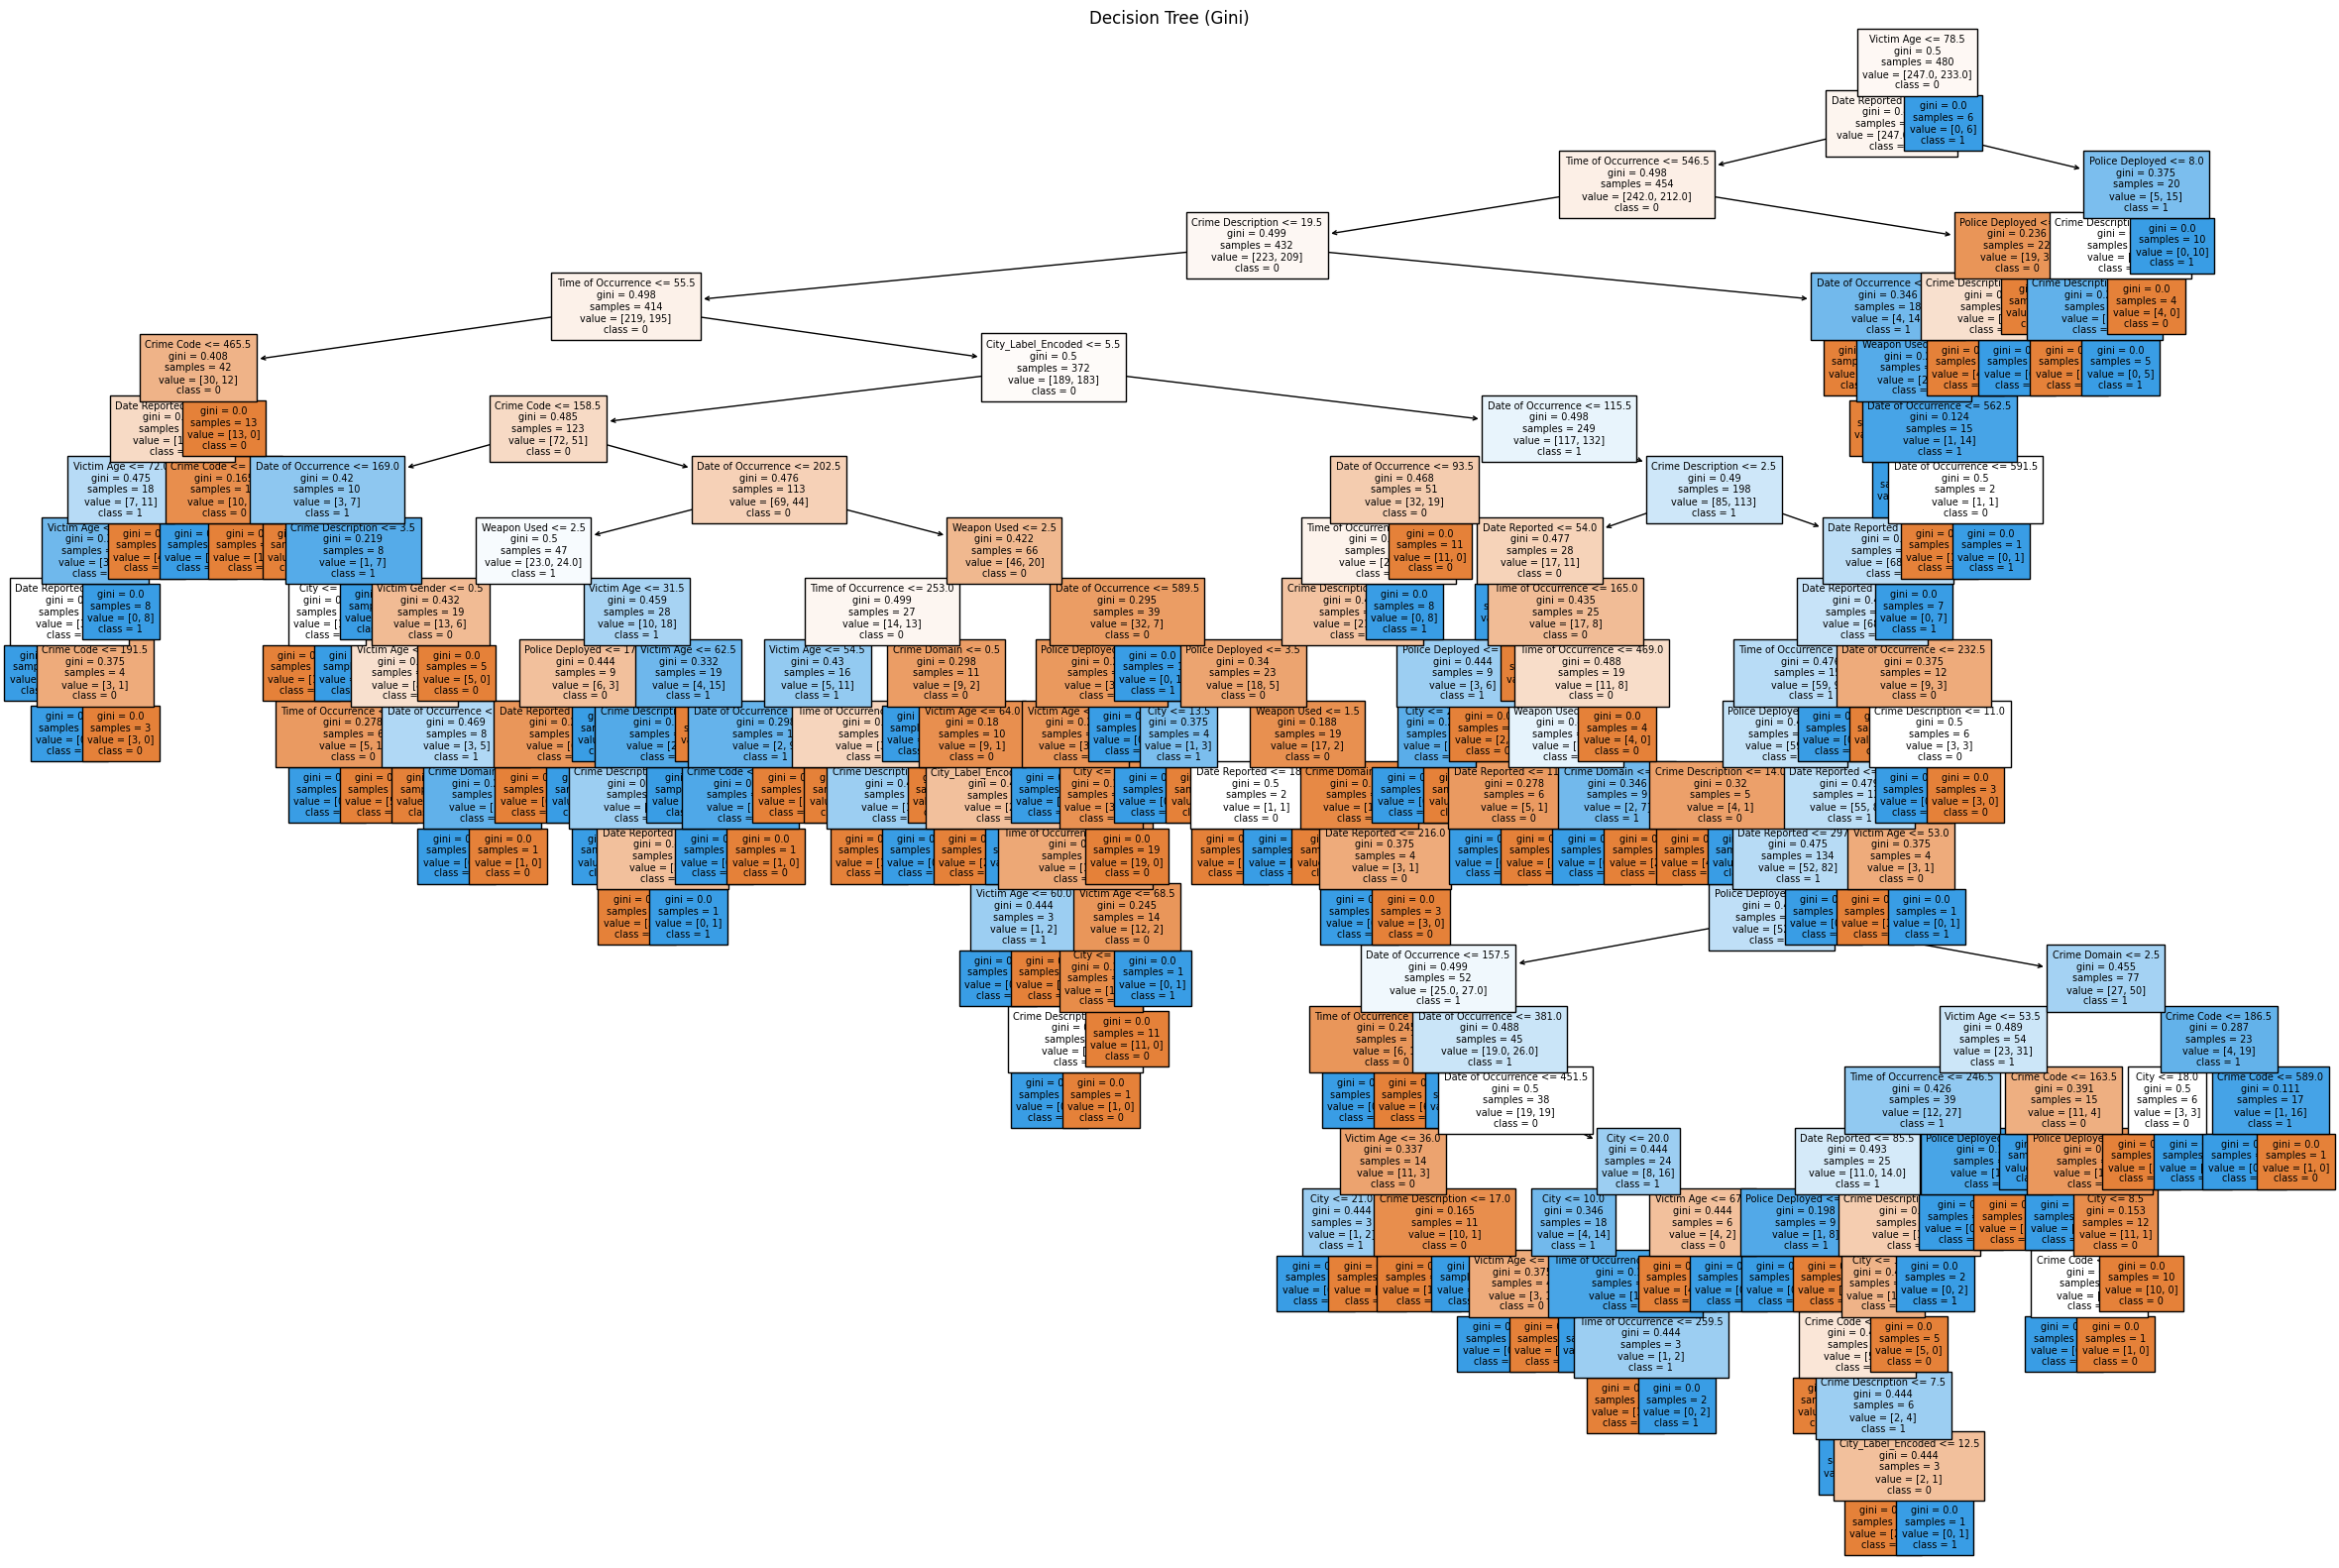

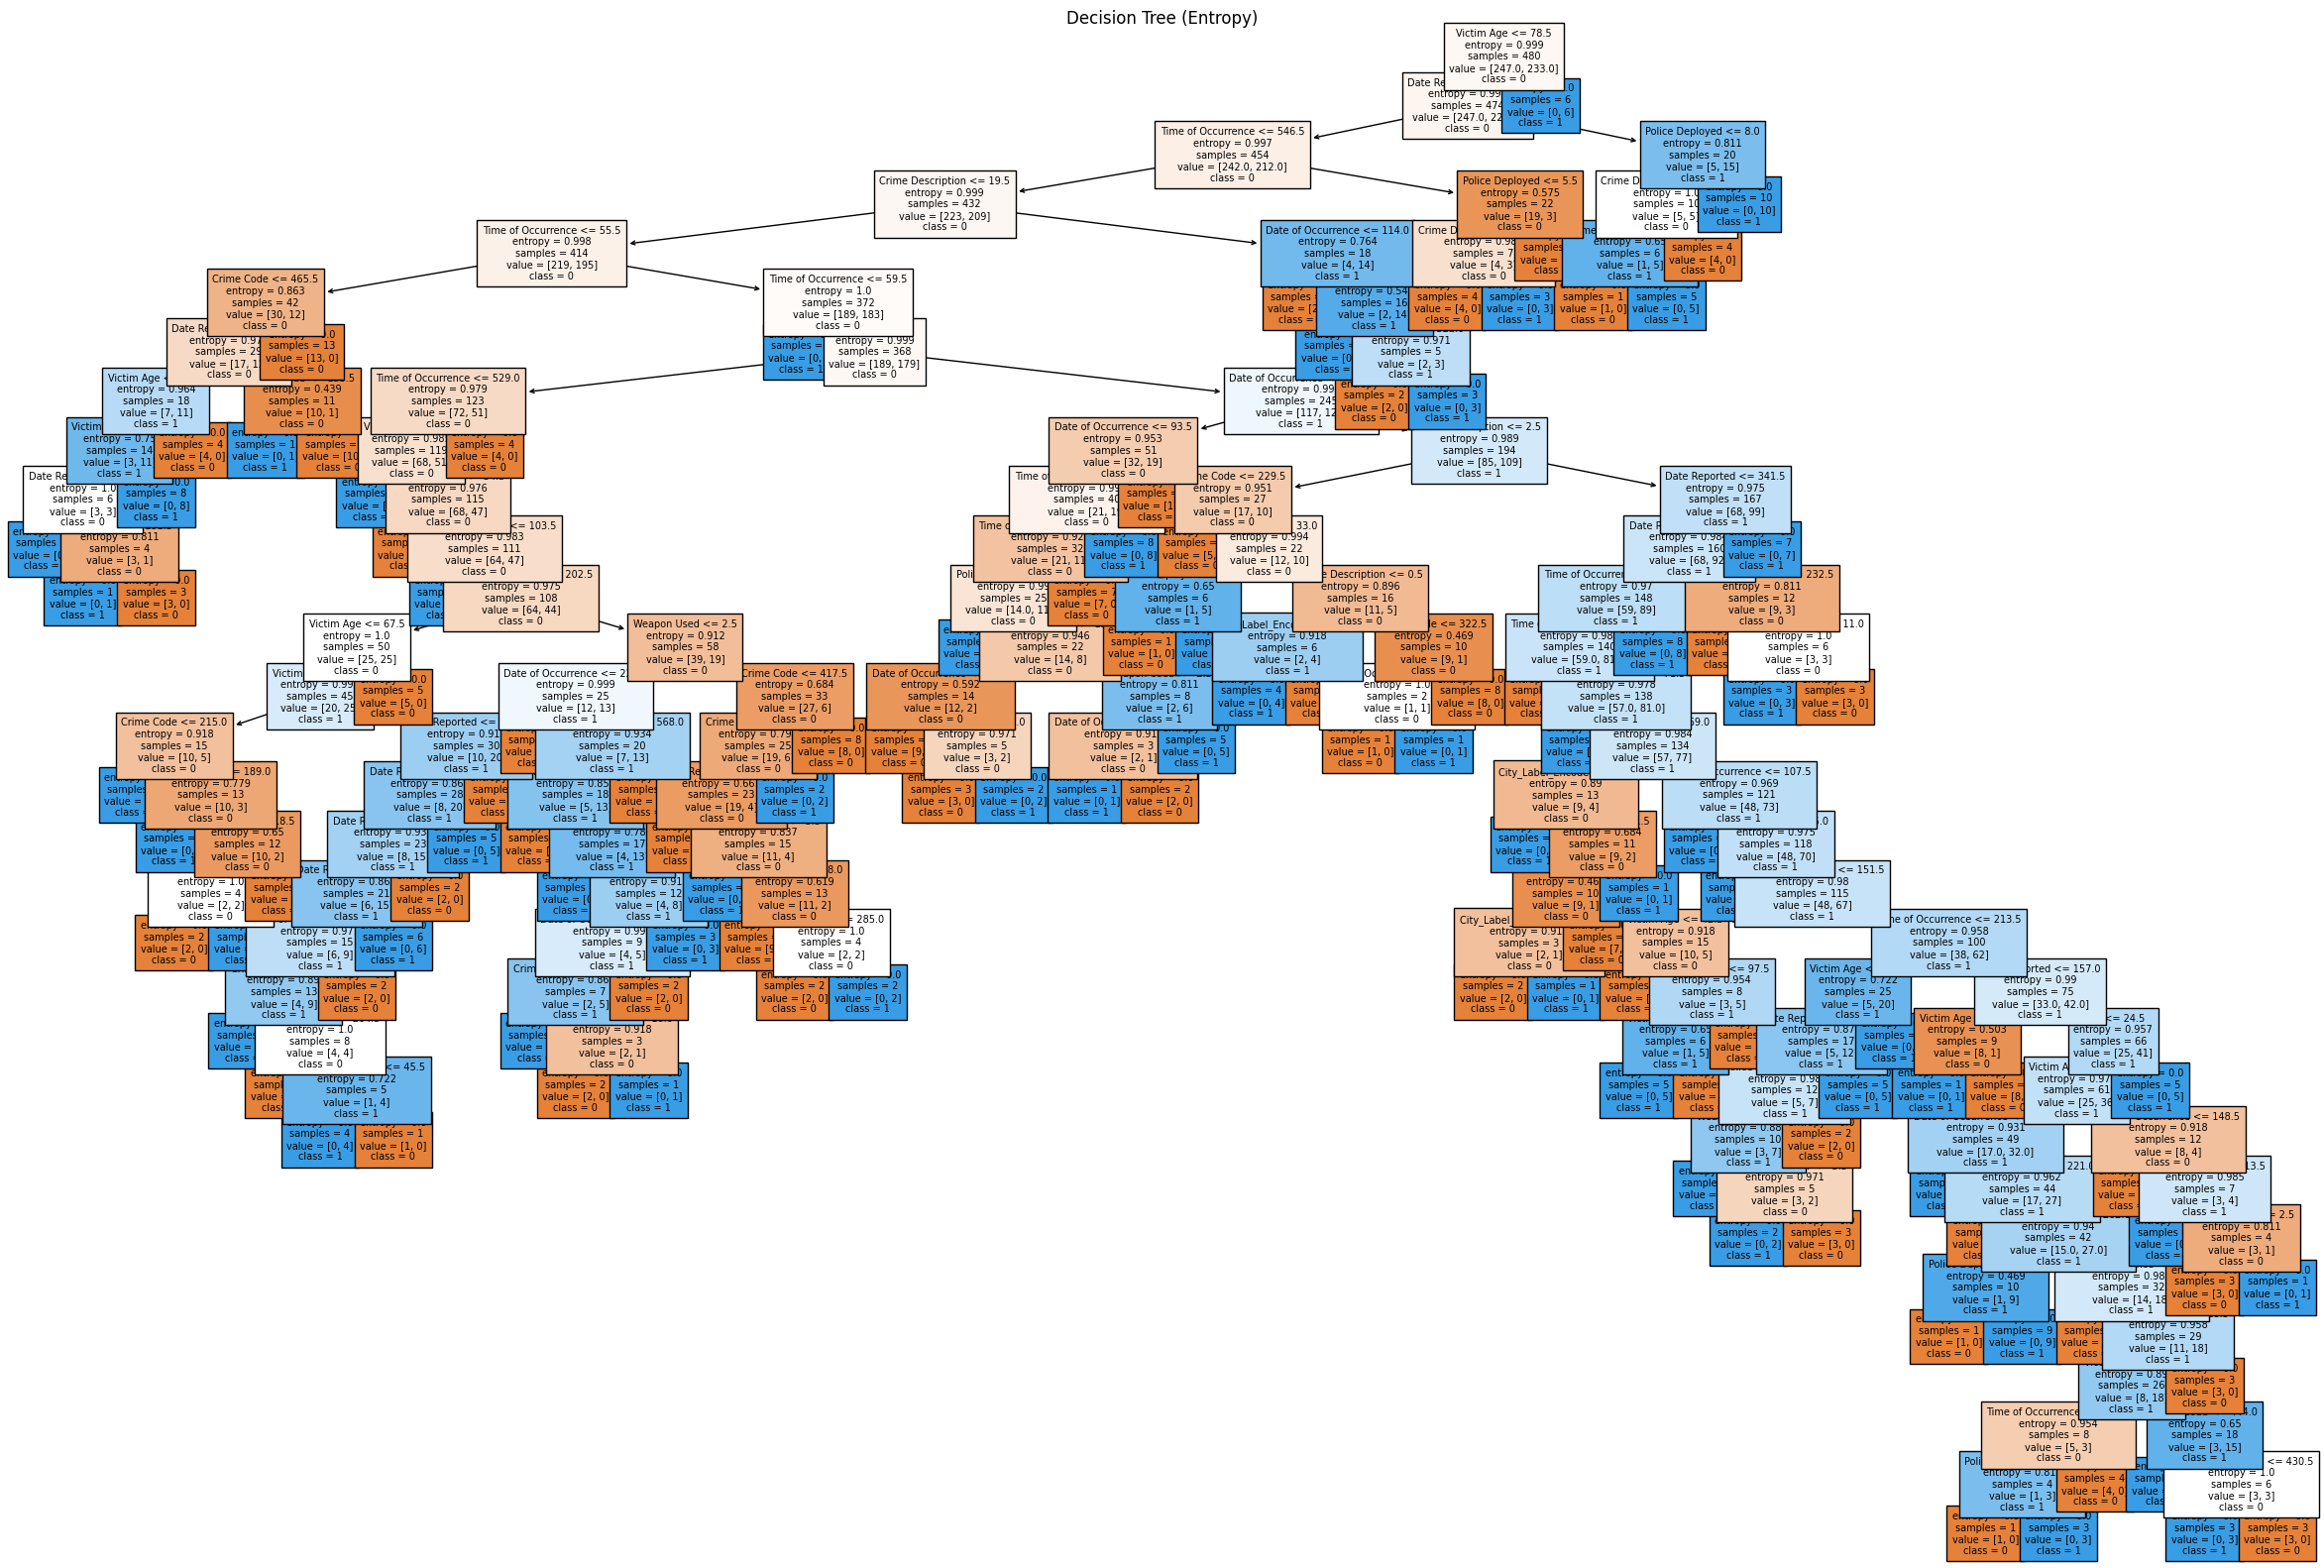

In [48]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Visualization of Gini Tree
plt.figure(figsize=(30, 20))
plot_tree(dt_gini, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True,fontsize=7)
plt.title('Decision Tree (Gini)')
plt.show()

# Visualization of Entropy Tree
plt.figure(figsize=(30, 20))
plot_tree(dt_entropy, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True,fontsize=7)
plt.title('Decision Tree (Entropy)')
plt.show()


In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt


dt_gini_prepruned = DecisionTreeClassifier(
    criterion='gini',
    max_depth=2,            
    min_samples_split=50,    
    min_samples_leaf=25      
)
dt_gini_prepruned.fit(X_train, y_train)


dt_entropy_prepruned = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=2,             
    min_samples_split=50,    
    min_samples_leaf=25      
)
dt_entropy_prepruned.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=25,
                       min_samples_split=50)

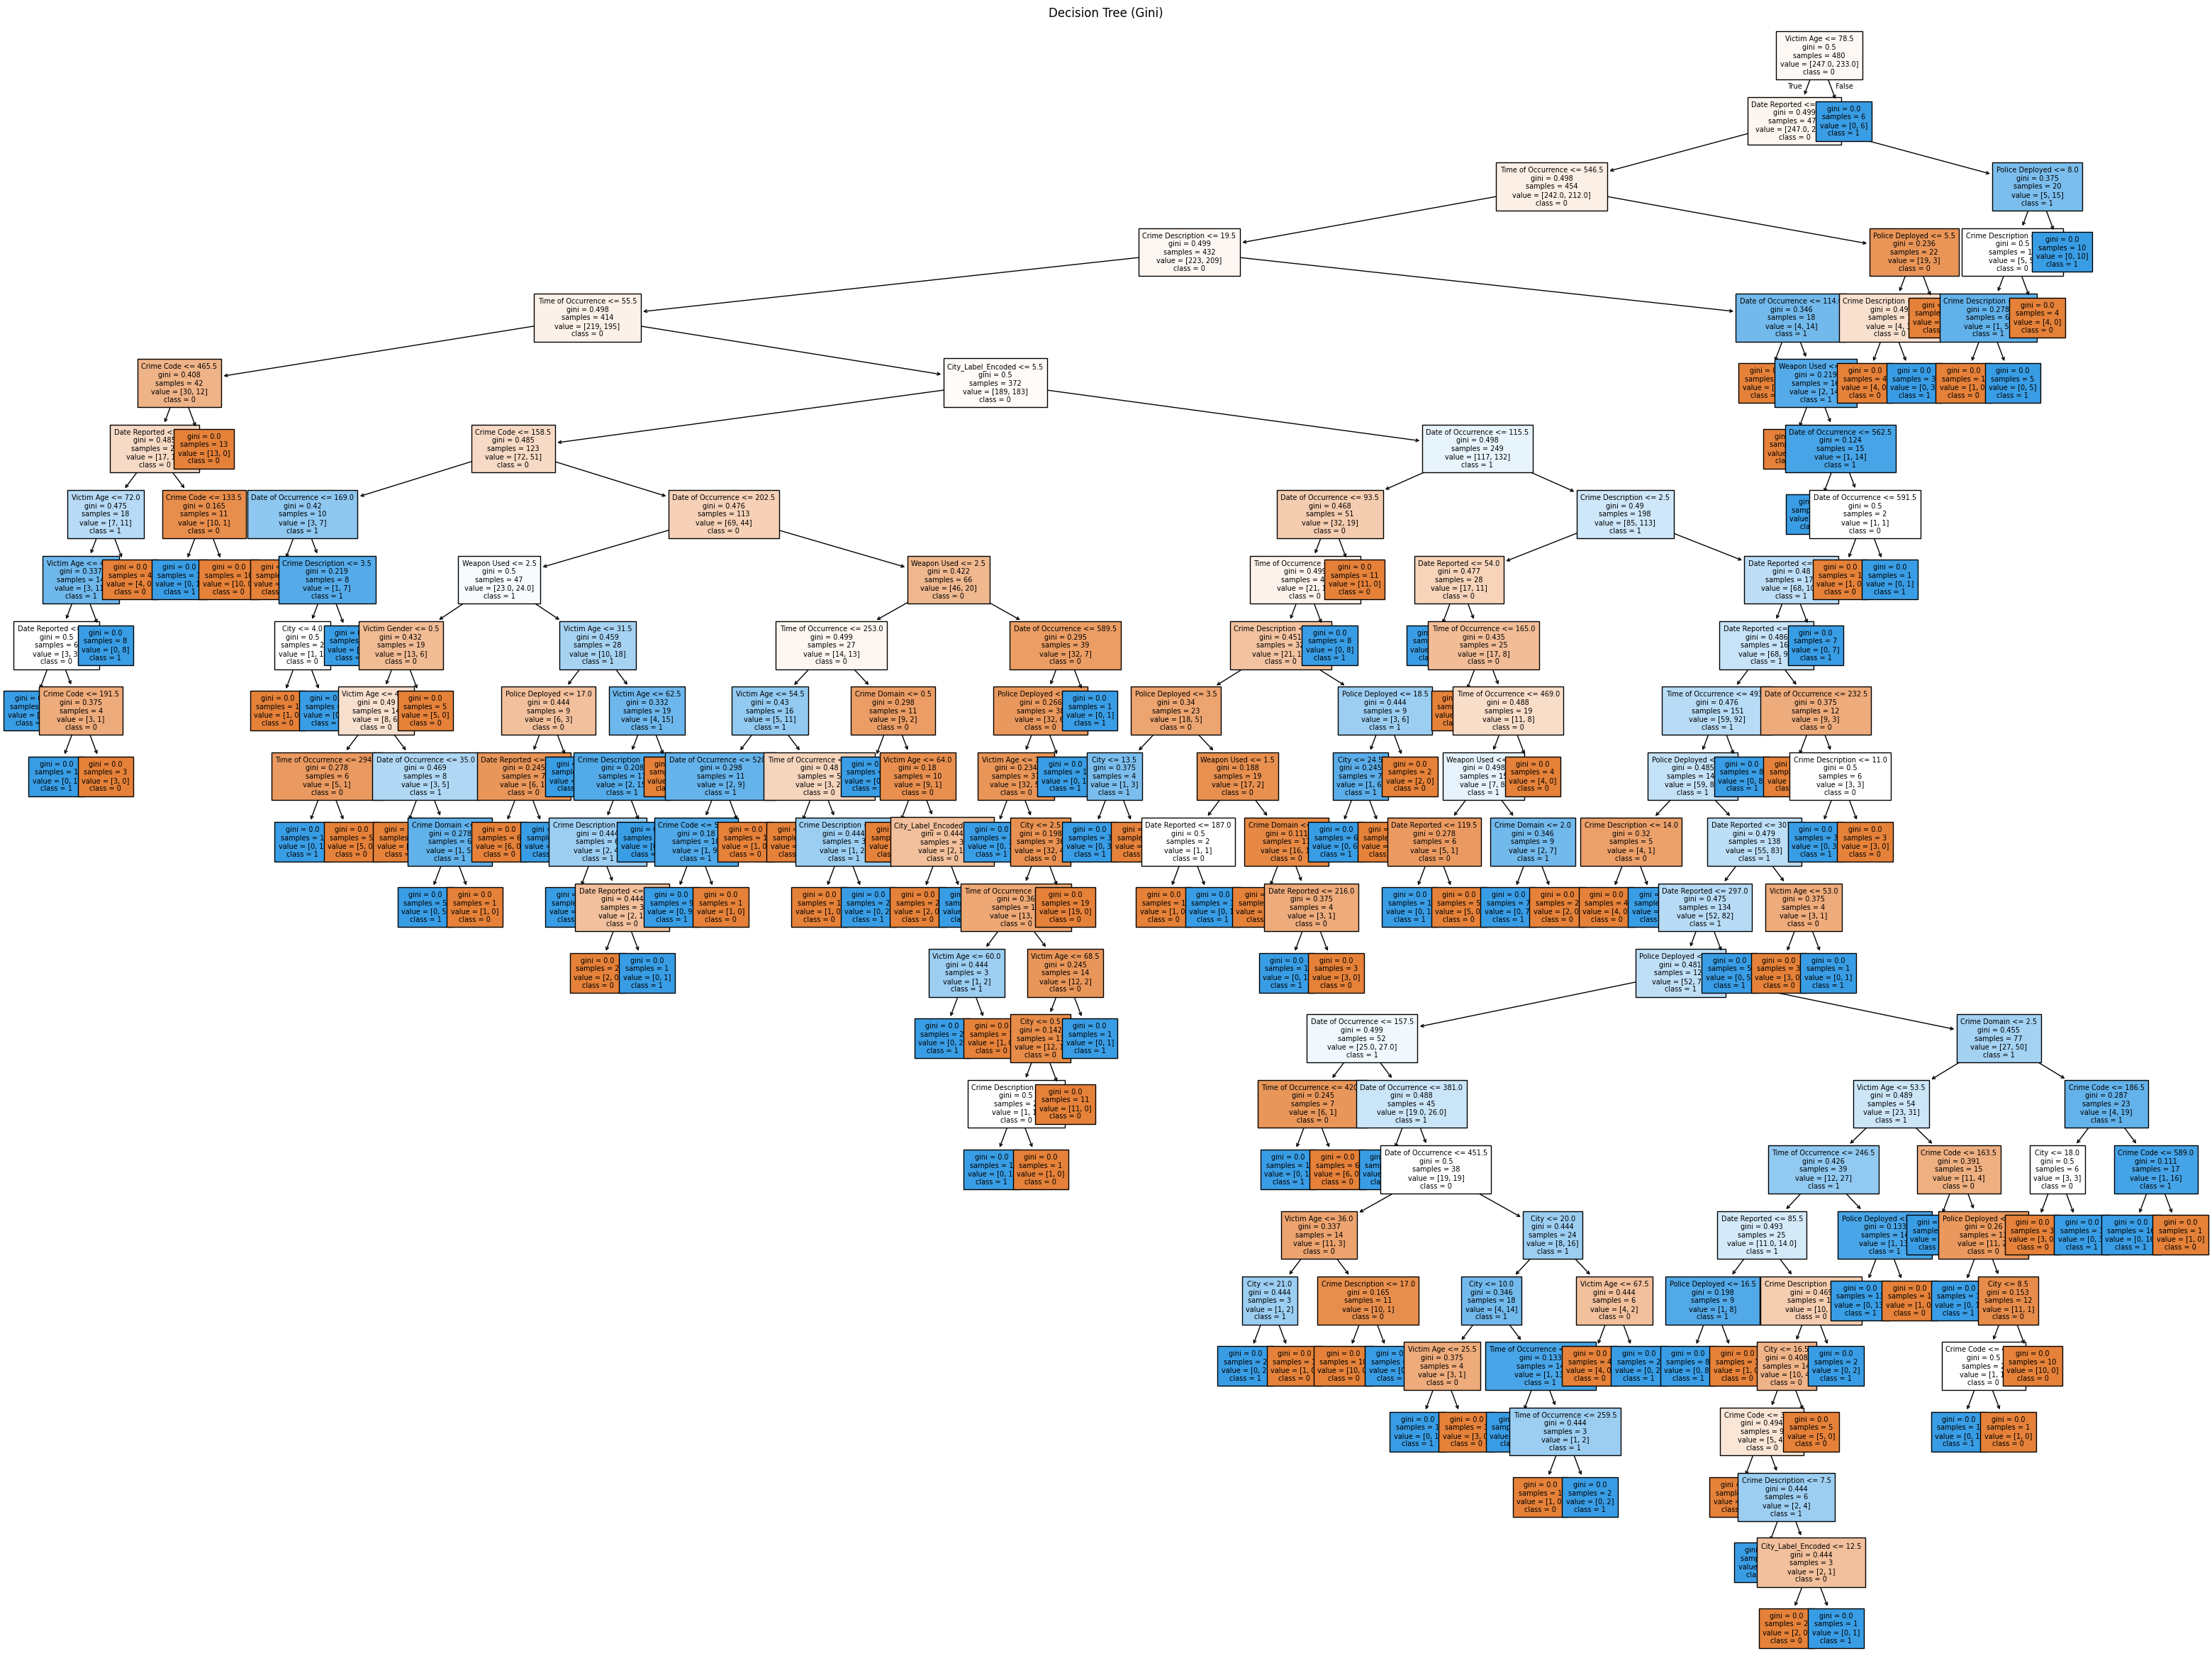

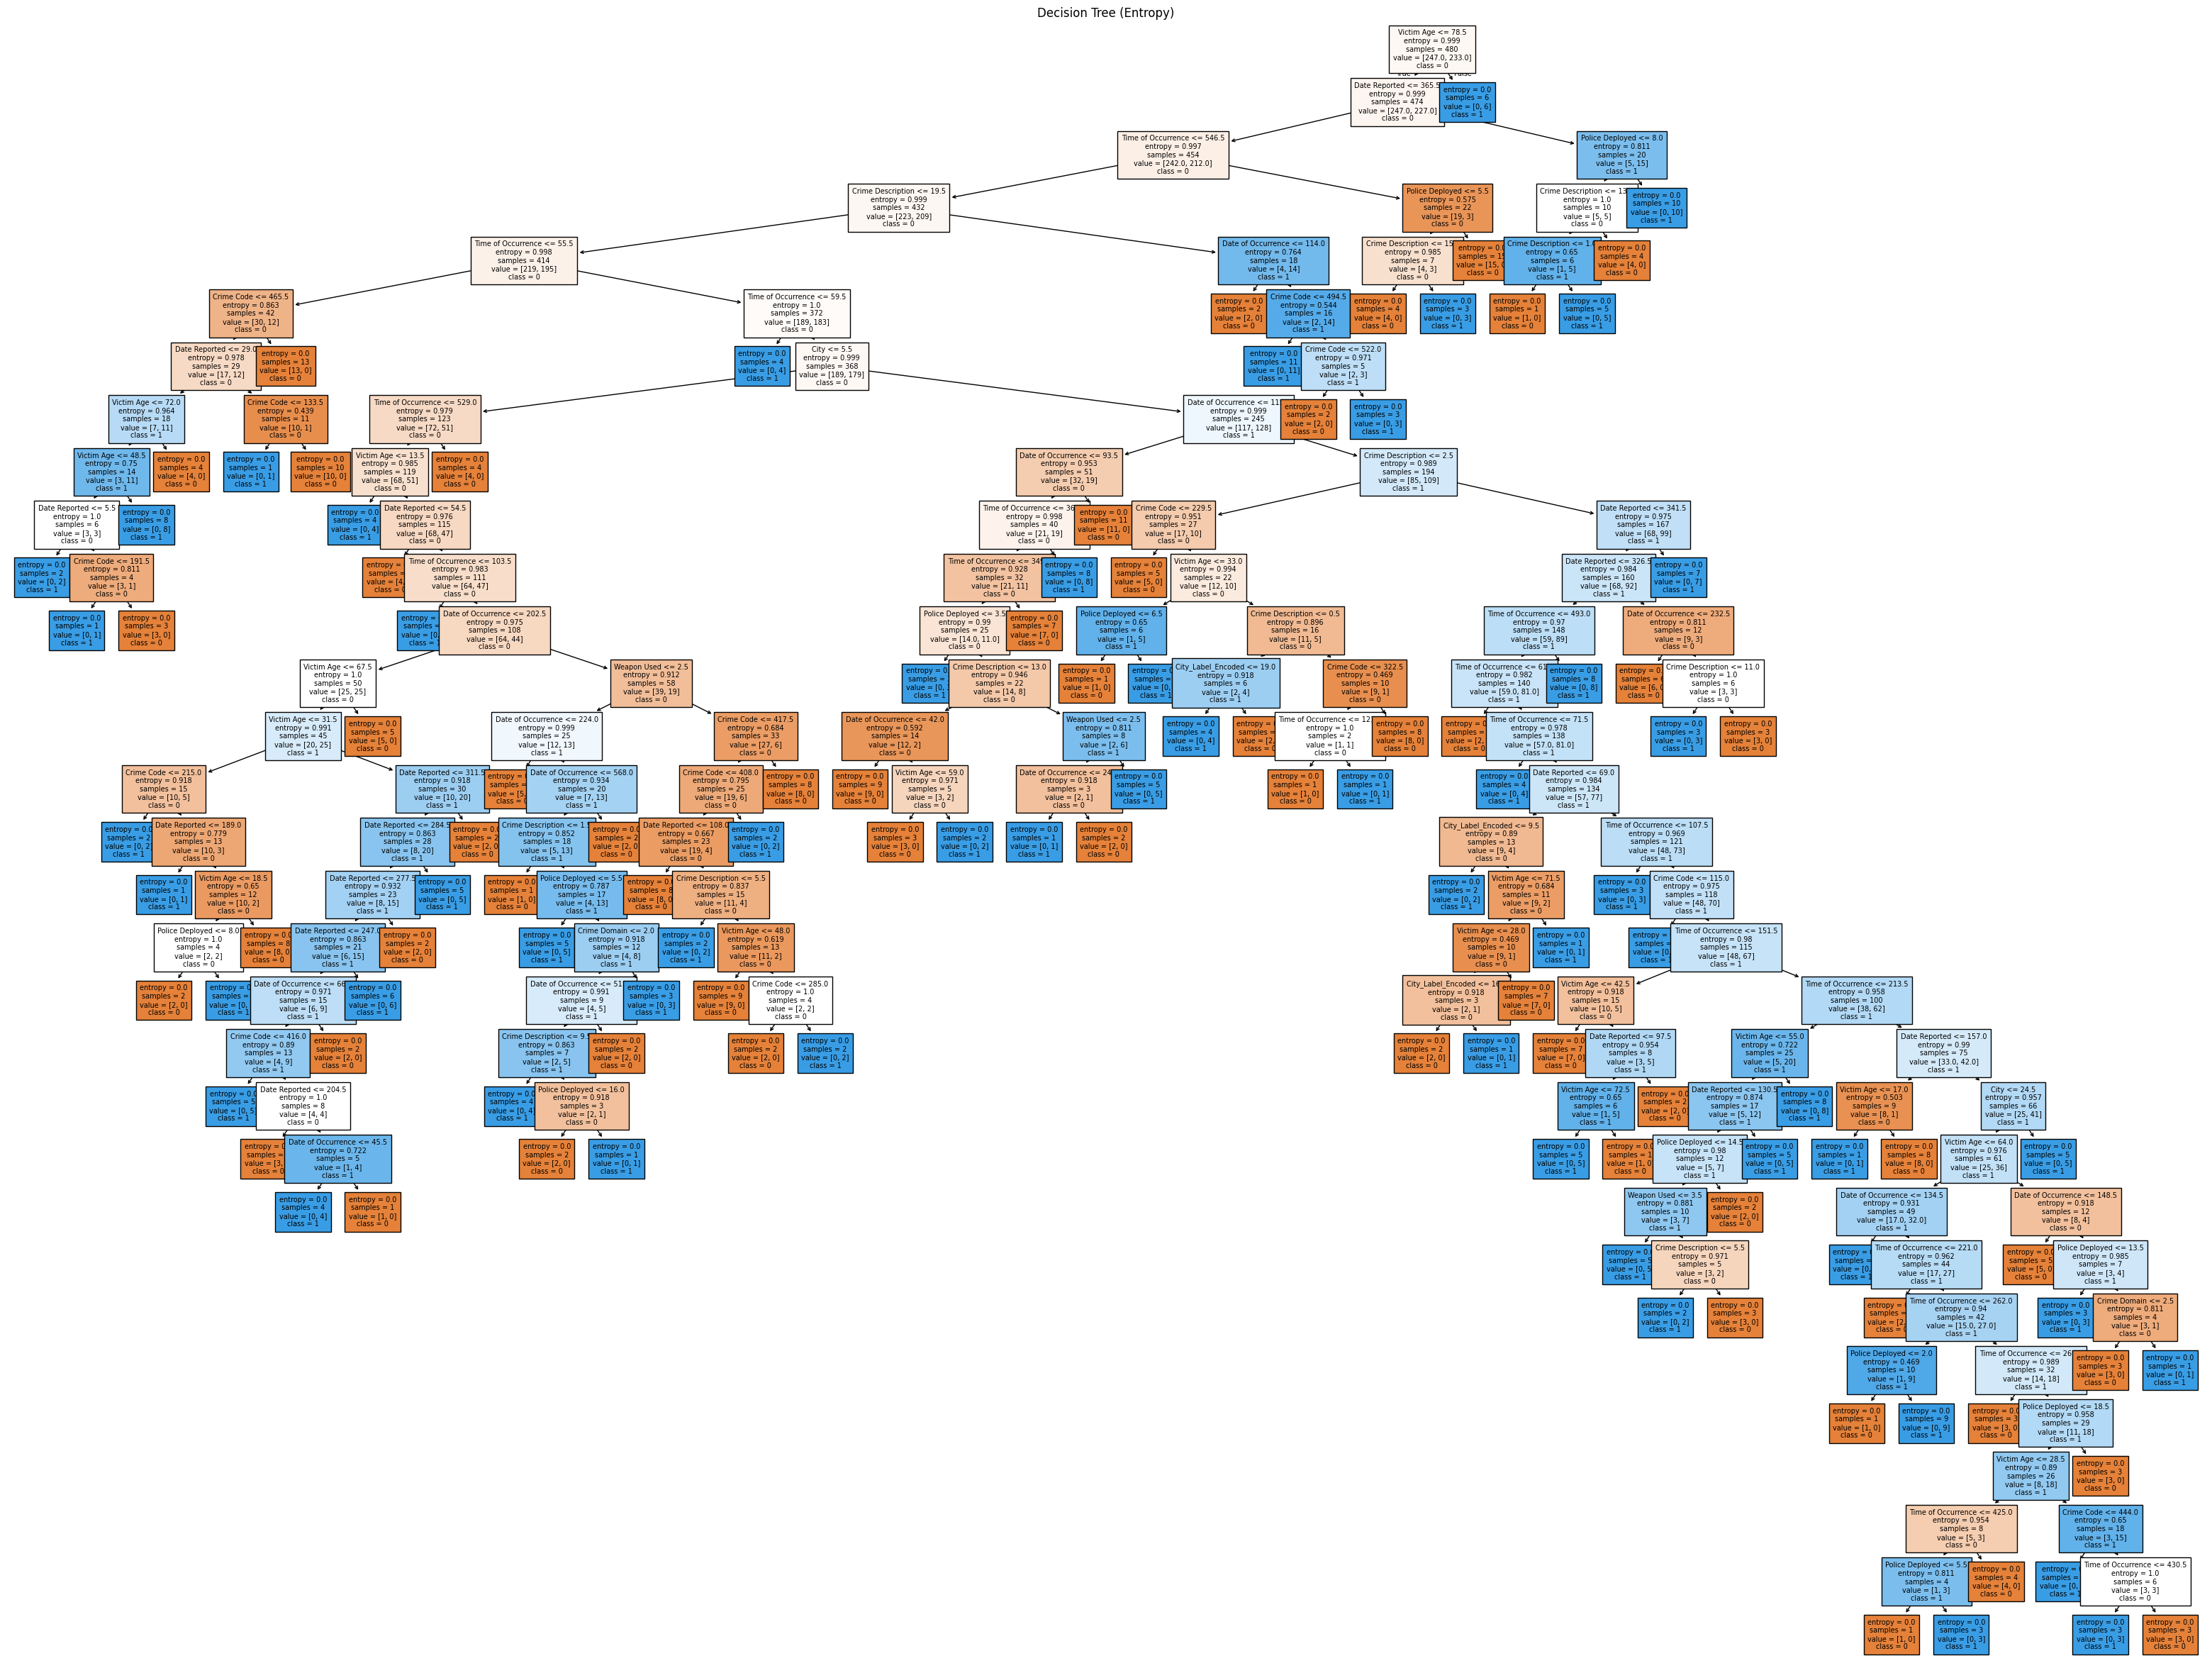

In [55]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Visualization of Gini Tree
plt.figure(figsize=(40, 30))
plot_tree(dt_gini, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True,fontsize=7)
plt.title('Decision Tree (Gini)')
plt.show()

# Visualization of Entropy Tree
plt.figure(figsize=(40, 30))
plot_tree(dt_entropy, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True,fontsize=7)
plt.title('Decision Tree (Entropy)')
plt.show()


**---------------------------------------------------------------------------------------------------------------------------------------------------------**

**MAIN TREE**

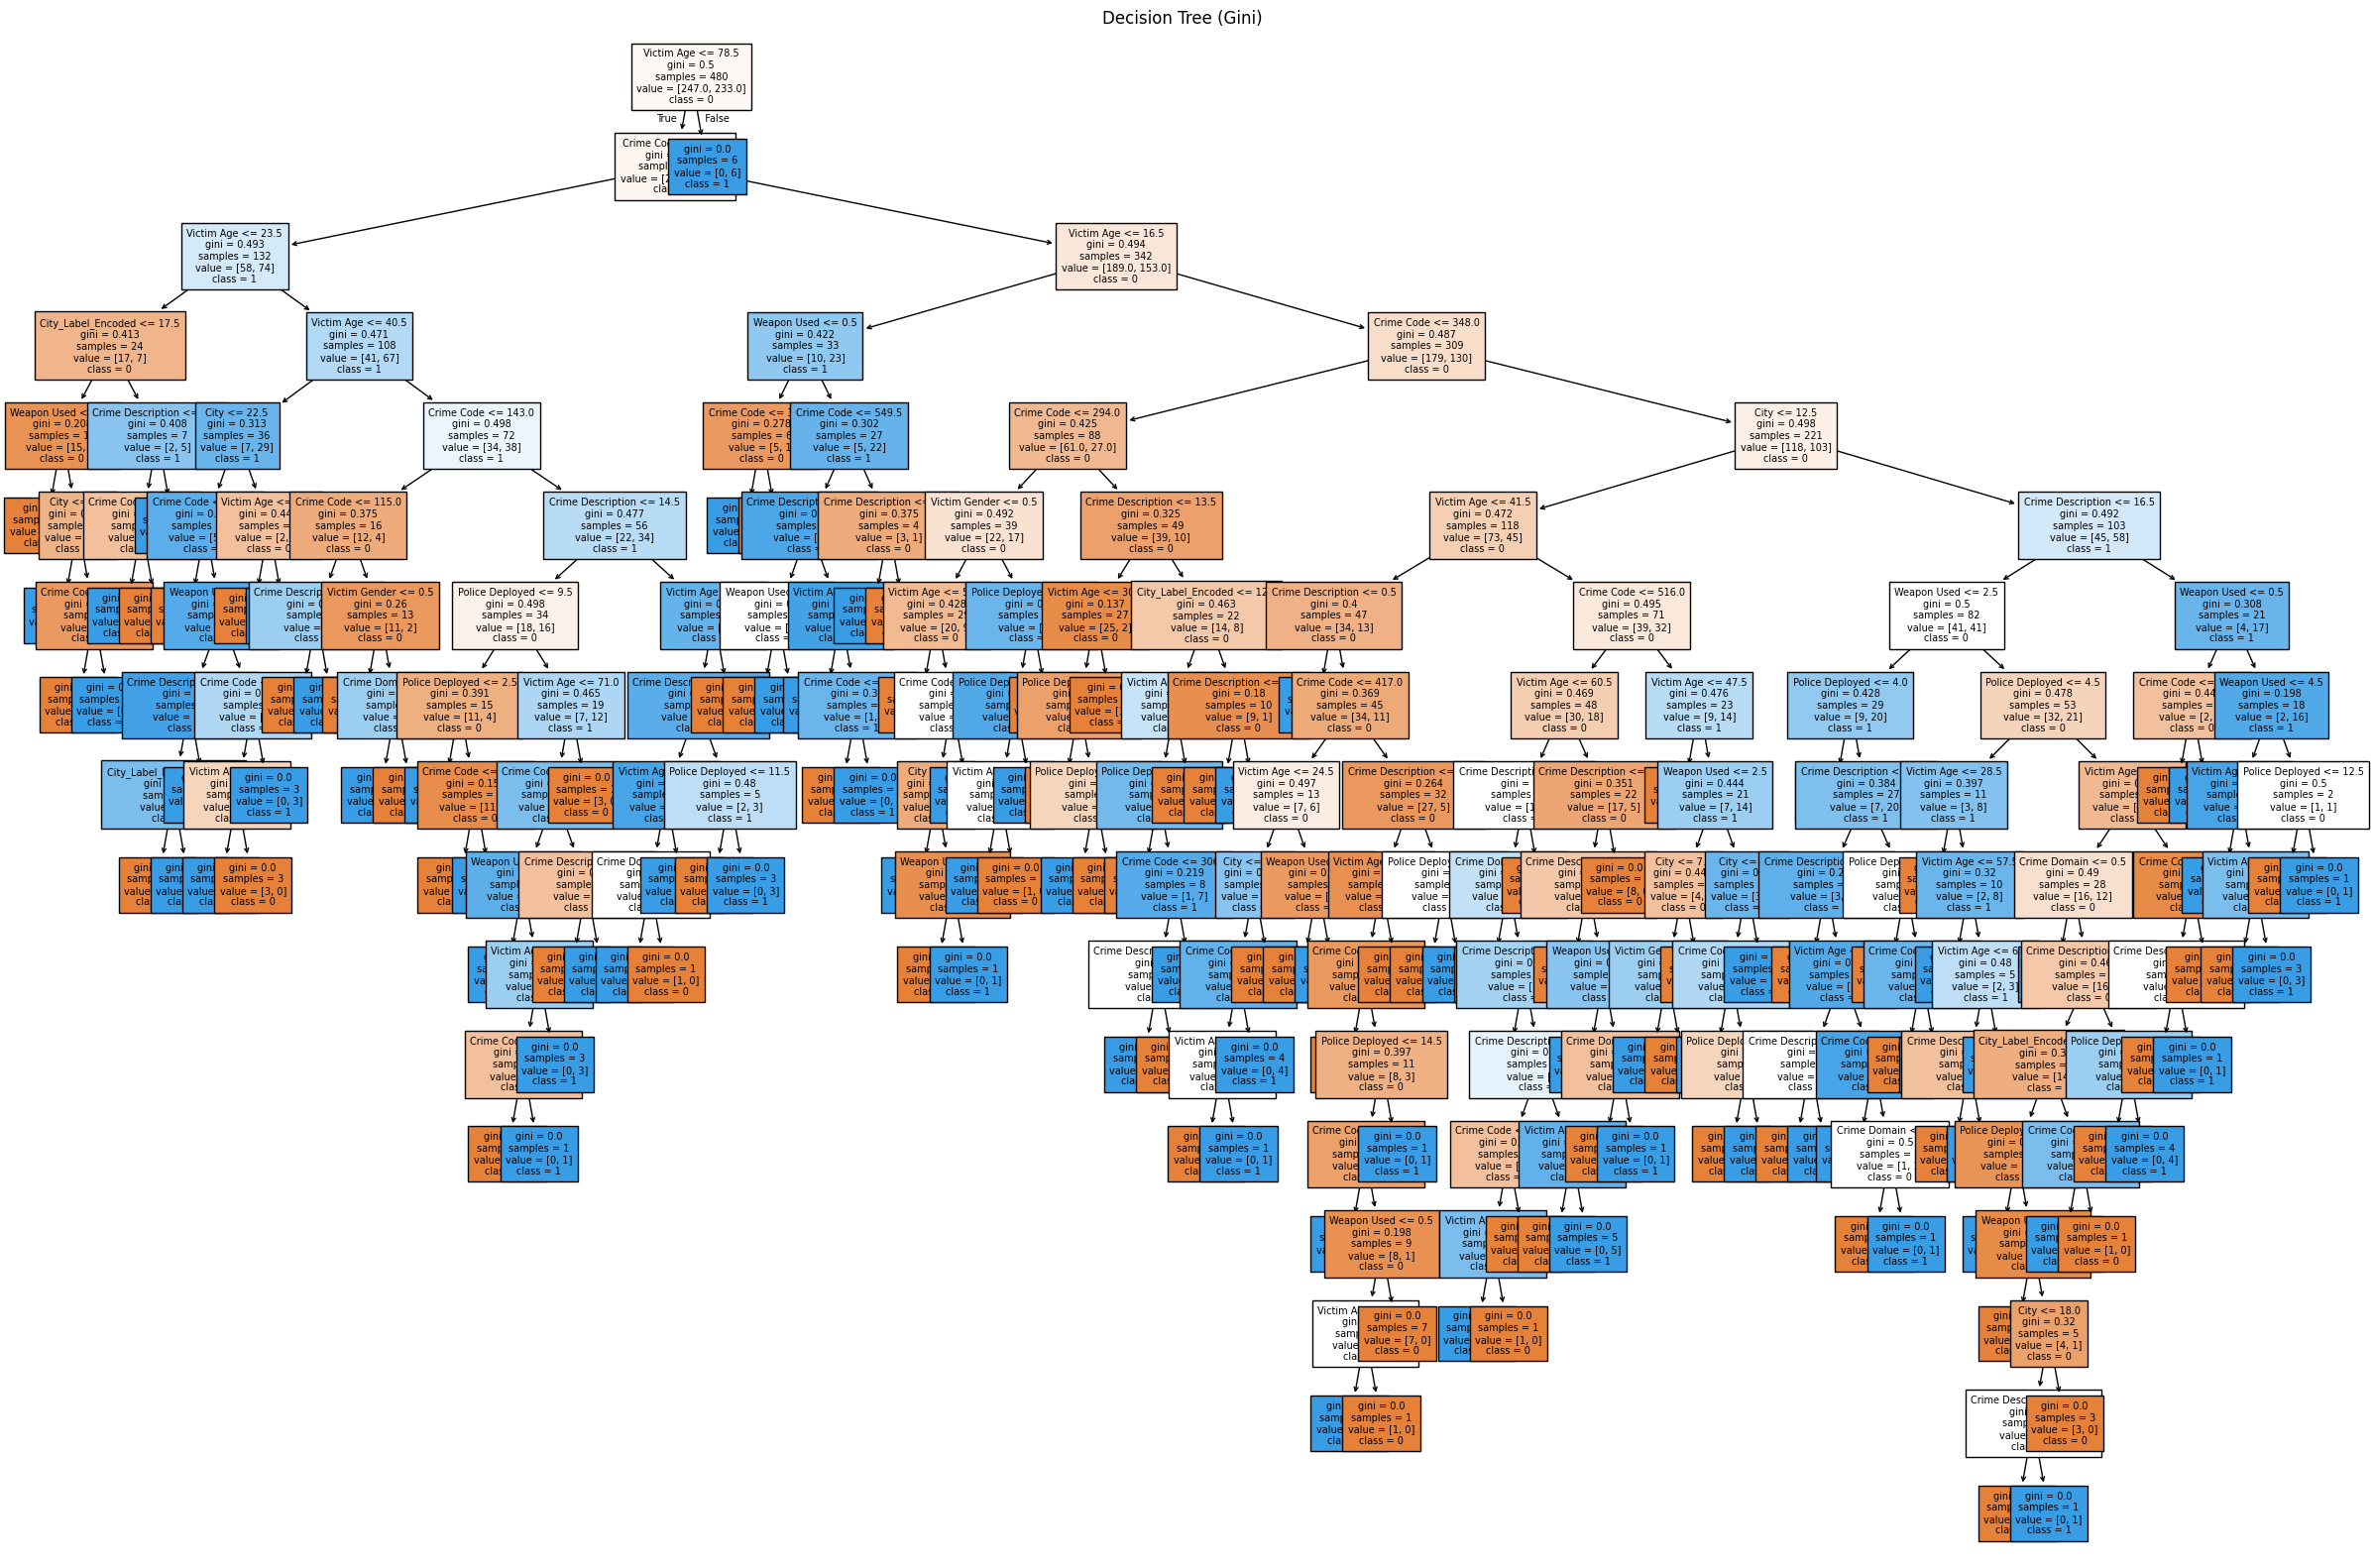

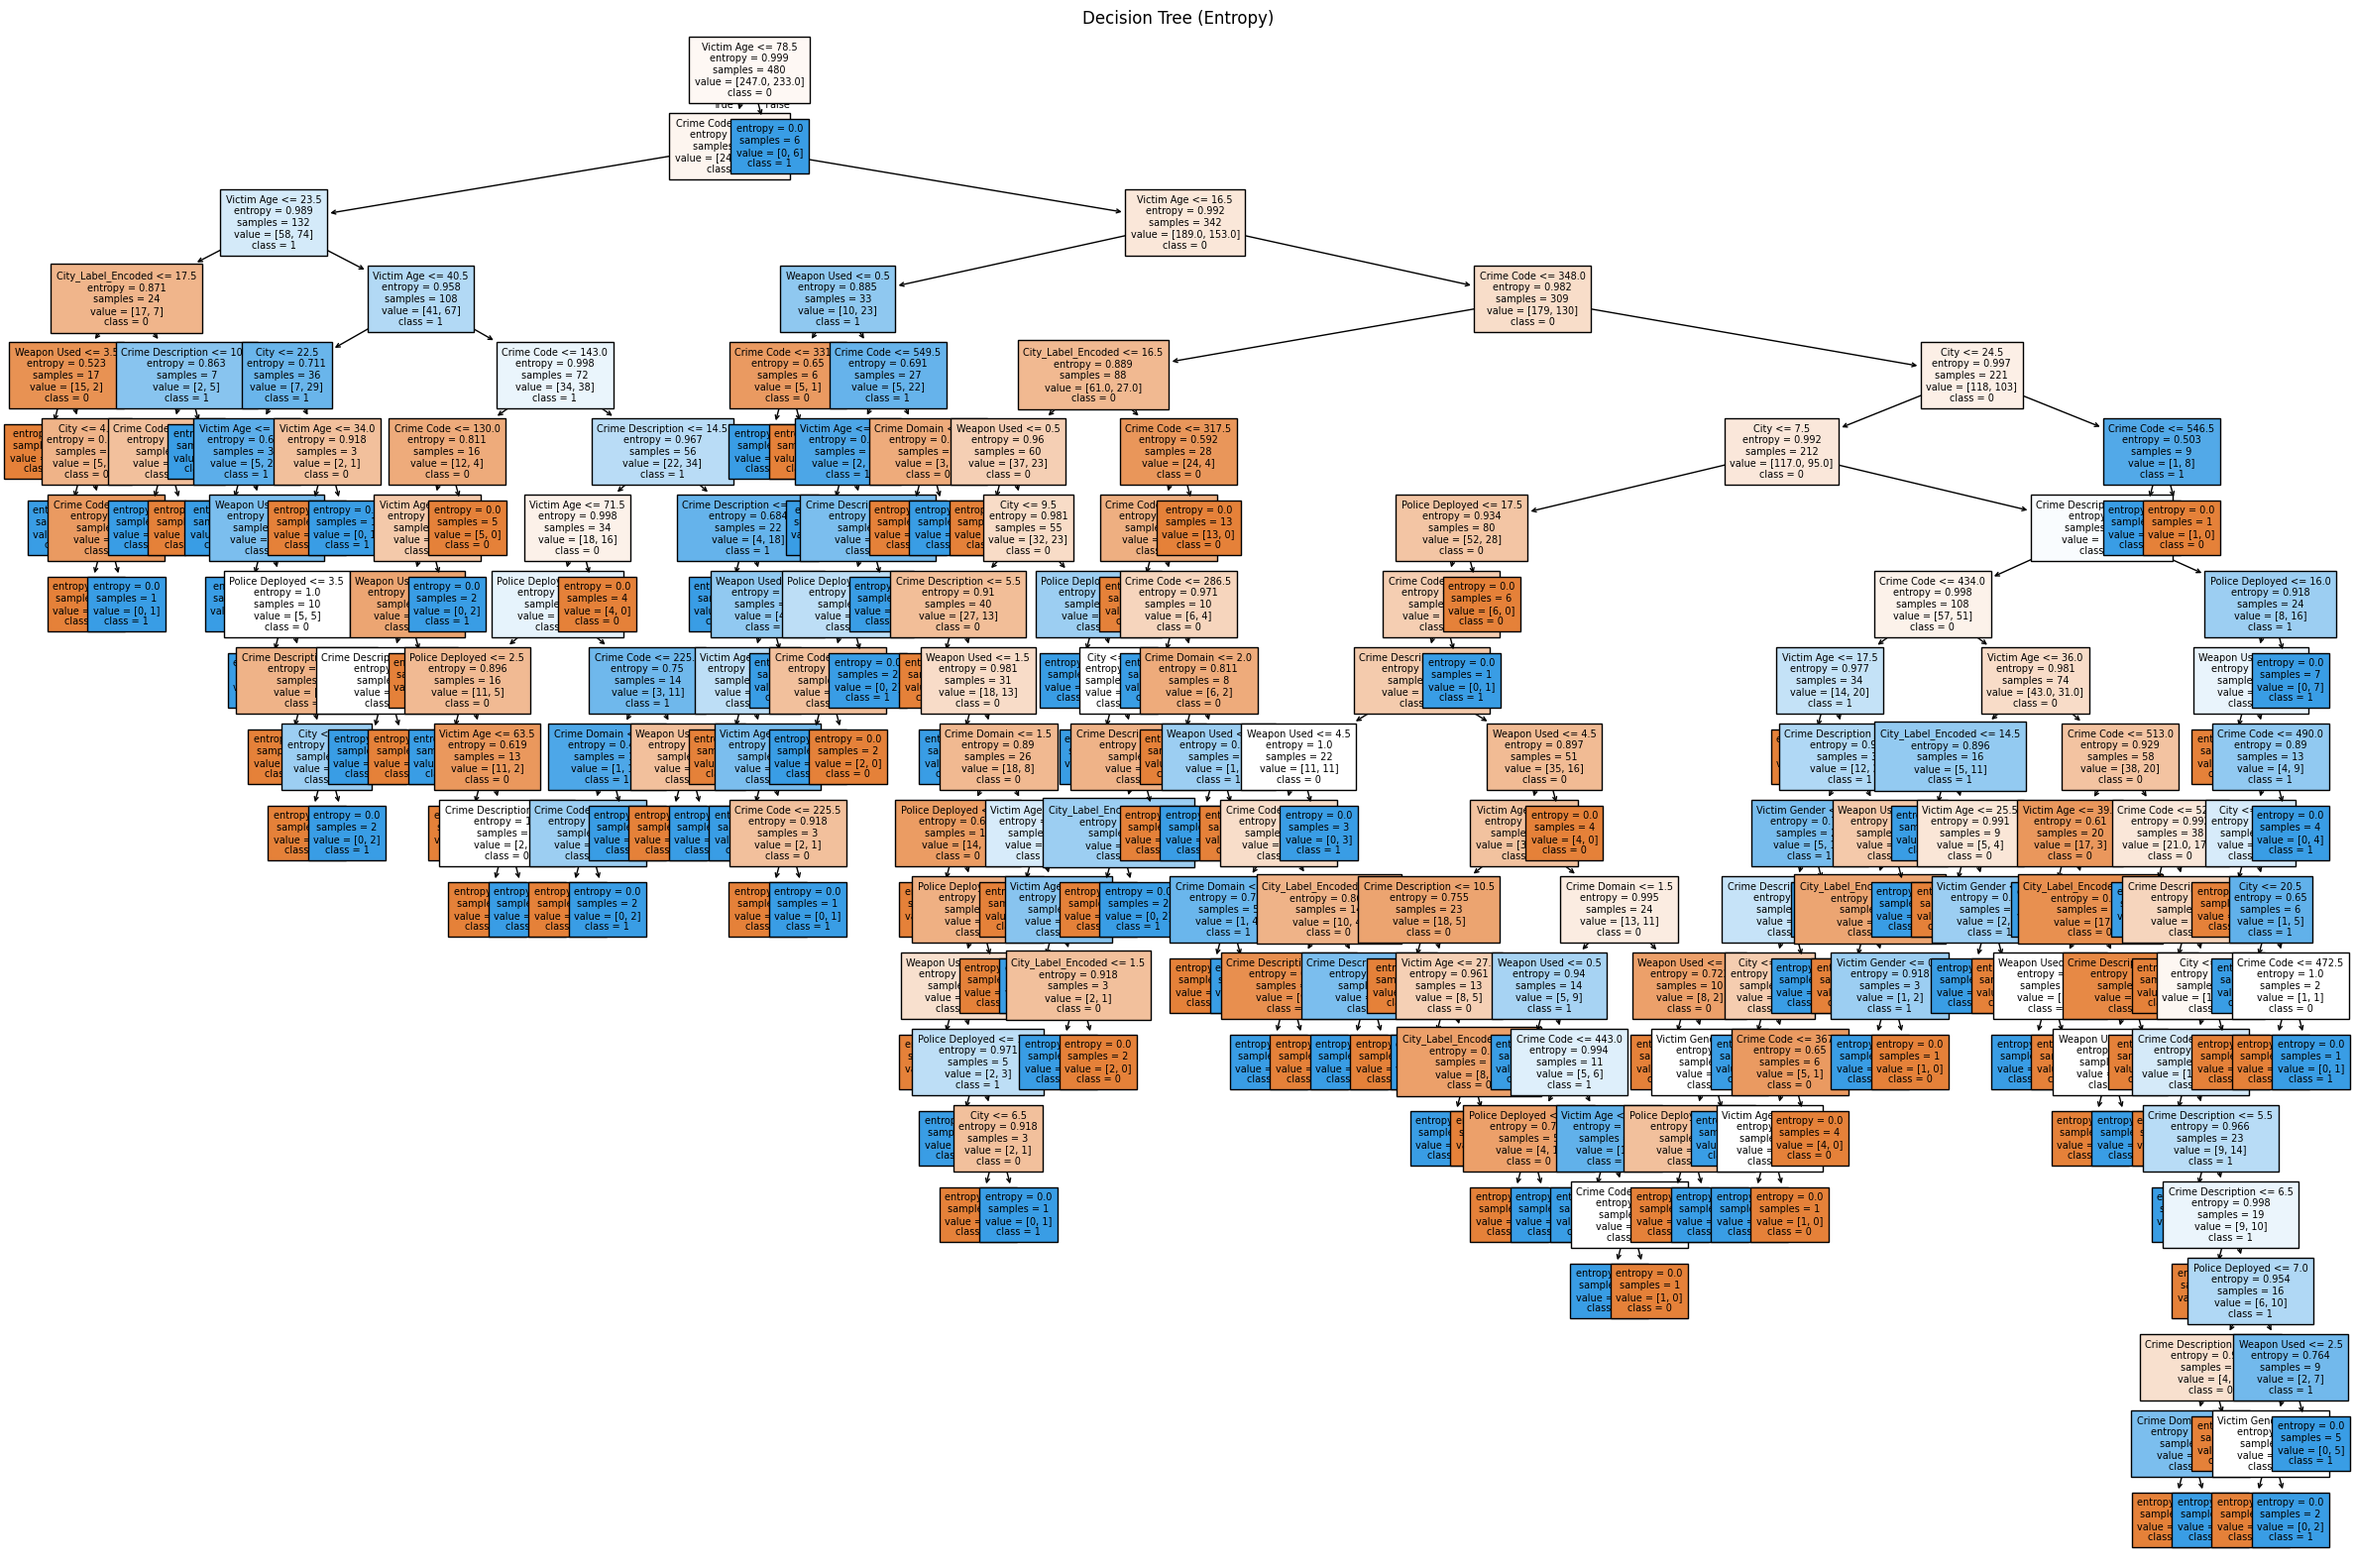

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np

# Visualization of Gini Tree
plt.figure(figsize=(30, 20))
plot_tree(dt_gini, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True,fontsize=7)
plt.title('Decision Tree (Gini)')
plt.show()

# Visualization of Entropy Tree
plt.figure(figsize=(30, 20))
plot_tree(dt_entropy, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True,fontsize=7)
plt.title('Decision Tree (Entropy)')
plt.show()


1. Root Node:The tree starts with a feature that best splits the data, representing the most significant decision factor.  
2. Decision Nodes: Each split shows the feature and threshold used, breaking the dataset into subsets with reduced impurity.  
3. Leaf Nodes: These represent final decisions or class predictions, showing the majority class and the number of samples classified.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

POST PRUNING WITH CCP_ALPHA

In [49]:

path_gini = dt_gini.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_gini = path_gini.ccp_alphas


path_entropy = dt_entropy.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas_entropy = path_entropy.ccp_alphas


In [50]:
# Post-pruned Gini Tree with high ccp_alpha
dt_gini_pruned = DecisionTreeClassifier(criterion='gini', ccp_alpha=ccp_alphas_gini[-2]) 
dt_gini_pruned.fit(X_train, y_train)

# Post-pruned Entropy Tree with high ccp_alpha
dt_entropy_pruned = DecisionTreeClassifier(criterion='entropy', ccp_alpha=ccp_alphas_entropy[-2]) 
dt_entropy_pruned.fit(X_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.014093105679026774, criterion='entropy')

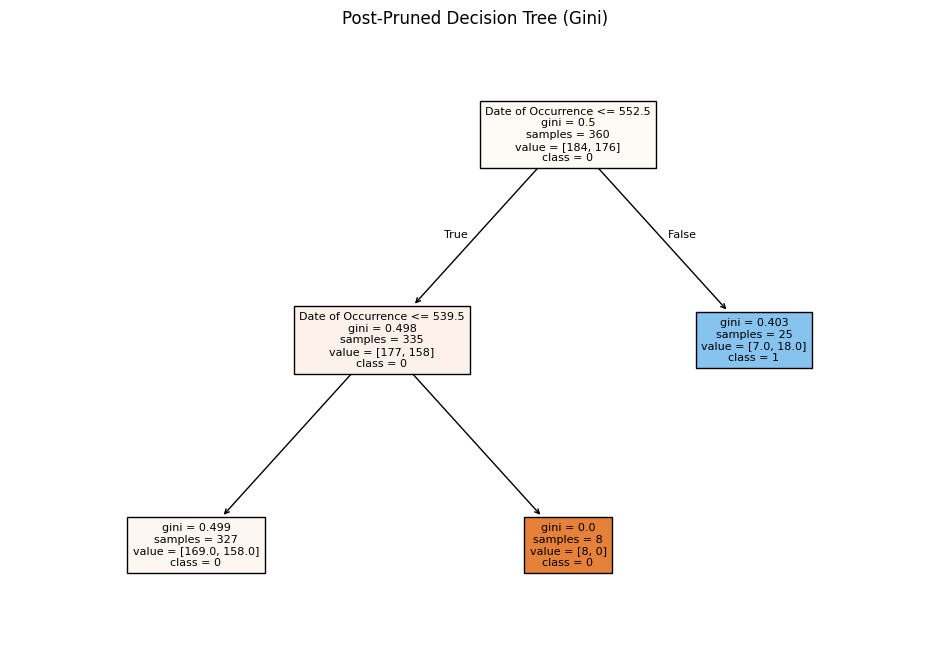

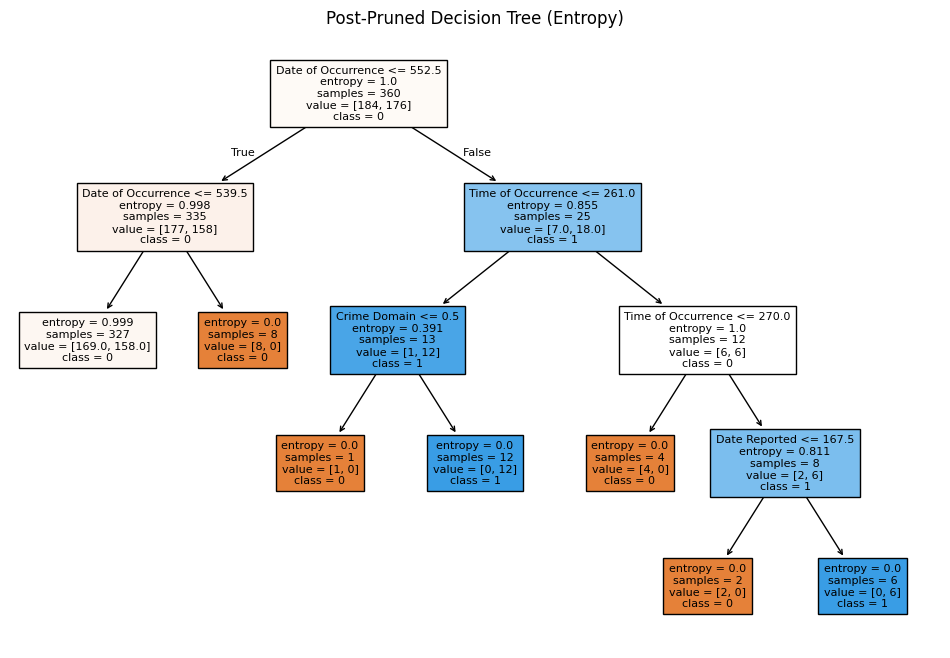

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualization of Pruned Gini Tree
plt.figure(figsize=(12, 8))  
plot_tree(dt_gini_pruned, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True, fontsize=8)
plt.title("Post-Pruned Decision Tree (Gini)")
plt.show()

# Visualization of Pruned Entropy Tree
plt.figure(figsize=(12, 8))
plot_tree(dt_entropy_pruned, feature_names=X.columns, class_names=[str(c) for c in np.unique(y)], filled=True, fontsize=8)
plt.title("Post-Pruned Decision Tree (Entropy)")
plt.show()


CONFUSION MATRIX

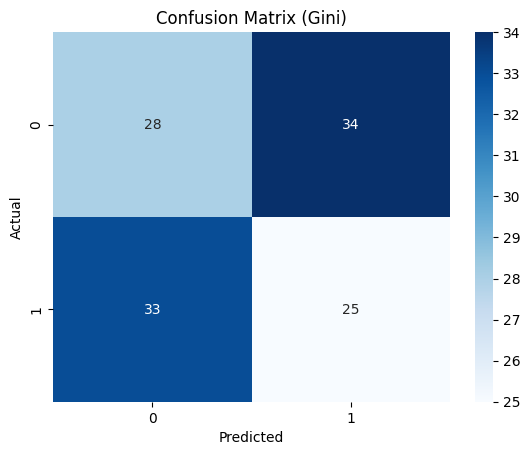

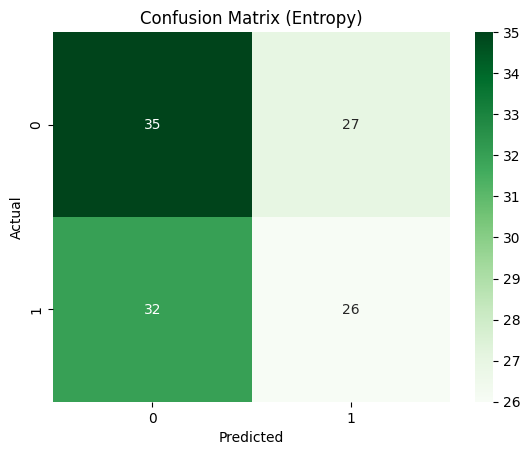

In [60]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix for Gini
conf_matrix_gini = confusion_matrix(y_test, y_pred_gini)
sns.heatmap(conf_matrix_gini, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix (Gini)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for Entropy
conf_matrix_entropy = confusion_matrix(y_test, y_pred_entropy)
sns.heatmap(conf_matrix_entropy, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix (Entropy)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


FINAL STATEMENT

The analysis reveals that Victim Age and Crime Code are the most influential features in predicting outcomes across both Gini and Entropy models. However, the models exhibit low accuracy (Entropy: 50.83%, Gini: 44.17%), indicating potential issues such as limited data, underfitting, or feature inefficiencies. 